# Proyecto 04 - Informe Final de Carrera

**Consigna:** Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

Para ello parto de mi [Proyecto 03](https://github.com/AncaraniAmadeo/DSproyects/blob/master/DS_Proyecto_03_ST_Ancarani.ipynb), el cual se trata de un problema de estimación de serie de tiempo. Buscando estimar la cantidad de pasos pagados en efectivo en el peaje de la autopista Illia para el último trimestre del 2019.

En este presente proyecto buscaré estimar aplicando la metodología ARIMA (Autoregressive integrated moving average), explicado en la sección final del mismo.

## Partiremos del Proyecto 03

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Parte A - Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Parte B - Predicción a Futuro (Machine Learning)

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Parte C - Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Parte A - Exploración de datos

#### 1. Cargamos las librerías necesarias

In [1]:
# pandas para carga de datos tipo csv y tratamiento de bases tipo DataFrame
import pandas as pd

# numpy para el tratamiento matemático de los datos
import numpy as np

# matplotlib.pyplot para graficar 
import matplotlib.pyplot as plt

# datetime para categorizar a los fechas y darles el respectivo tratamiento dentro de nuetro dataframe 
import datetime

# seasonal_decompose para graficar una descompisición de una serie de tiempo en componentes: tendencia, 
# ciclo (estacionalidad) y el error 
from statsmodels.tsa.seasonal import seasonal_decompose

# cargue matplotlib para modificar sus parametros de salida por defecto en el tamaño de los graficos
import matplotlib

# plot_acf y plot_pacf sirven para graficar la autocorrelacion simple y la parcial  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# seaborn es otra libreria de gráficos
import seaborn as sns

# set() sirve para mejorar estéticamente los graficos
sns.set()

# adfuller es una prueba estadistica para probar la autocorrelacion
from statsmodels.tsa.stattools import adfuller

# mean_squared_error es la métrica utilizada para seleccionar el mejor modelo
from sklearn.metrics import mean_squared_error

# importo los modelos utilizados: randomforest y prophet
from sklearn.ensemble import RandomForestRegressor
from fbprophet import Prophet

# gridsearchcv es una metodo utilizada para generar un cross-validation 
# y búsqueda paso a paso para la selección de los hiperparámetros del modelo
from sklearn.model_selection import GridSearchCV

# TimeSeriesSplit es un metodo que sirve para separar la serie de tiempo en train y test
from sklearn.model_selection import TimeSeriesSplit

# librería para iterar
import itertools

# modulo que se utiliza para modelos estadisticos diferentes
import statsmodels.api as sm

# para evitar warnings innecesarios al momento de presentar el proyecto
import warnings
warnings.filterwarnings('ignore')

# modulos para realizar la estimación mediante arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

Importing plotly failed. Interactive plots will not work.


1.1 Carga de los datos

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

1.2 Primera observación de tipos de datos y primeras 5 instancias:

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

1.3 Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

* **periodo**: año del dataset 
* **fecha**: año dia mes
* **hora_inicio**: hora de inicio de la cuenta de vehiculos (DROP)
* **hora_fin**: hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)
* **dia**: dia de la semana 
* **estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)
* **sentido**: Centro o Provincia
* **tipo_vehiculo**: Liviano o Pesado
* **forma_pago**: Hay varias y varian entre los años.
* **cantidad_pasos**: Cantidad de vehiculos

1.4 Corroboro que las variables periodo, dia, y hora_fin tengan valores lógicos:

In [10]:
print(data_2019['periodo'].unique())
print(data_2018['periodo'].unique())
print(data_2017['periodo'].unique())

[2019]
[2018]
[2017]


In [11]:
print(data_2019['dia'].unique())
print(data_2018['dia'].unique())
print(data_2017['dia'].unique())

['Martes' 'Viernes' 'Lunes' 'Miércoles' 'Sábado' 'Jueves' 'Domingo']
['Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes' 'Sábado' 'Domingo']
['Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes' 'Sábado']


In [12]:
print(data_2019['hora_fin'].unique())
print(data_2018['hora_fin'].unique())
print(data_2017['hora_fin'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0]


1.5 Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**, para ello se concatenan los 3 periodos en una sola tabla y se filtra lo mencionado.

Además, eliminamos las columnas que no aportan información adicional como "hora_inicio" y "periodo":

In [13]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

1.6 Tranformaciones sobre la variable "fecha" para que la misma incluya el "horario final":

In [14]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

# Analizamos como queda la base
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [15]:
# Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

1.7 Reordenamos el dataset por fecha:

In [16]:
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

1.8 Graficamos el dataset obtenido

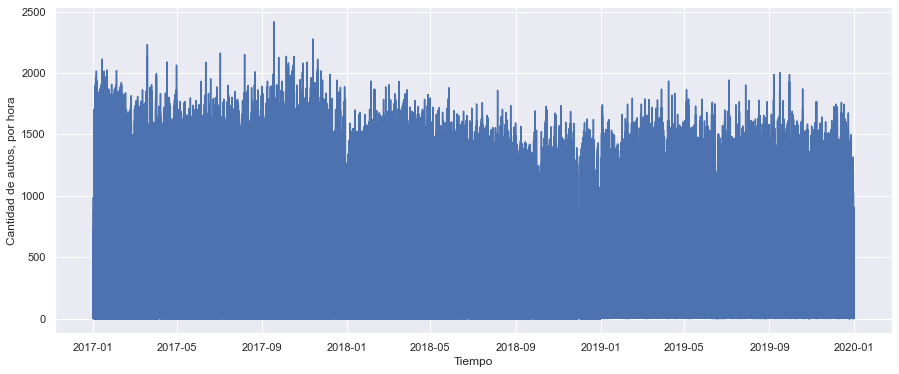

In [17]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

1.9 Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable

In [18]:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

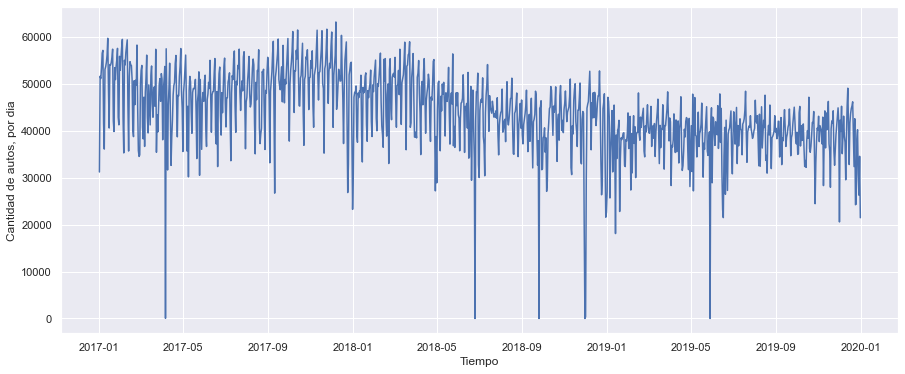

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

1.10 Análisis de Valores Faltantes:

    1.10.1 Chequeo posibles valores faltantes en FECHA:

In [20]:
diario["fecha"] = diario.index
diario['date_check'] = diario.fecha.diff()
diario.date_check.value_counts()

1 days    1094
Name: date_check, dtype: int64

No se verificaron errores en las fechas observadas ya que por cada observación tenemos un dia de diferencia.

In [21]:
diario.drop(["date_check", "fecha"], axis=1, inplace=True)

    1.10.2 Chequeo posibles valores faltantes en CANTIDAD PASOS:

In [22]:
diario.isna().sum()

cantidad_pasos    0
dtype: int64

No se verificaron missings en las fechas observadas para la variable "cantidad_pasos".

1.11 Tratamiento Anomalías:

    1.11.1 Análisis del Gráfico: A lo largo del gráfico anterior se observan 6 puntos que podrían considerarse anomalos ya que se encuentran muy lejanos a la serie. Es por este motivo que trazo un límite en 10000 para eliminar dichas observaciones y realizar una interpolación de estos datos para suavizar la serie 

In [23]:
diario.cantidad_pasos[diario.cantidad_pasos <= 10000]

fecha
2017-04-06     40
2018-06-25      0
2018-09-25      0
2018-11-30      0
2018-12-01    350
2019-05-29      0
Name: cantidad_pasos, dtype: int64

    1.11.2 ¿Existen motivos que justifiquen estos valores?. Realizamos una recopilación de información en distintos portales de noticias para entender el dataset y sus anomalias:

Para estas fechas sucedieron los siguientes sucesos:
*  2017-04-06: [Paro general de la CGT](https://www.pagina12.com.ar/30044-una-muestra-de-rechazo-al-ajuste-pro)
*  2018-06-25: [Paro general de la CGT](https://www.infobae.com/diarios/2018/06/25/clarin-lunes-25-de-junio-de-2018/)
*  2018-09-25: [Paro general de la CGT](https://www.clarin.com/viajes/paro-general-25-septiembre-operan-aeropuertos_0_0KqpCPX5B.html)
*  2018-11-30: [Comienzo G20 en Argentina](https://www.infobae.com/america/portadas/2018/11/30/clarin-argentina-viernes-30-de-noviembre-de-2018/)
*  2018-12-01: [Continúa G20 en Argentina](https://www.infobae.com/america/portadas/2018/12/01/clarin-argentina-sabado-1-de-diciembre-de-2018/)
*  2019-05-29: [Paro general de la CGT](https://www.perfil.com/noticias/politica/como-se-vive-paro-miercoles-29-de-mayo-en-las-redes-sociales.phtml)

    1.11.3 Decidimos eliminar estas observaciones y realizar estimaciones para completar los nuevos valores faltantes:

In [24]:
diario.cantidad_pasos[diario.cantidad_pasos <= 10000] = np.nan
diario.isna().sum()

cantidad_pasos    6
dtype: int64

Hecho esto, debemos completar la serie mediante alguna metodología. Se opta por utilizar el método interpolate, la cual es una función utilizada para rellenar los NaN en dataframes o series. La metodología de interpolación por defecto es la lineal.

In [25]:
print(diario.isna().sum())
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


    1.11.4 Re-graficar la serie: vemos una mayor concentración de los datos 

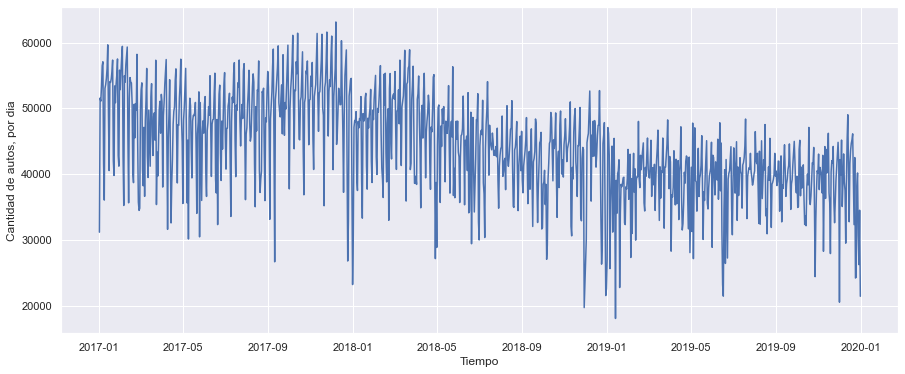

In [26]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

1.12 Descomposición de la Serie:

Algunas series se comportan como $Tendencia + Estacionalidad + Ruido$, mientras que otras tienen comportamientos más complejos, como $Tendencia * Estacionalidad * Ruido$. Se encuentran diferentes técnicas para obtener estos componentes:
        
    1.12.1 Metodología manual: Debemos realizar los siguientes pasos
        
        * Obtener la **tendencia** a través de *medias móviles*: Consiste en tomar una ventana de tiempo suficientemente grande y promediar la serie sobre esa ventana. Una ventaja de este método es que no asume ninguna forma para la serie de tiempo así que suele funcionar en muchos casos.

        * Una vez que estimada la tendencia, voy a tomar la serie original, restarle la tendencia y obtener una nueva serie sin tendencia, donde esperamos que sea la componente **estacional** la que domine. Luego, para obtener componentes **estacionales**, se suele asumir una forma armónica (tipo seno o coseno). Es decir, se puede hacer un procedimiento similar al que hecho con la tendencia (ajustar y restar a la serie sin tendencia) para obtener **ruido + componentes restantes**.


    1.12.2 Librería Statsmodel:
    
    A través de Statsmodels, que cuenta con muchas herramientas para análisis estadísticos, el método seasonal_decompose realiza el trabajo por nosotros, obteniendo cada componente de la serie.
    
    
Realizaremos cada método para elegir uno y describir el comportamiento de la serie, comenzaremos con la metodología manual, tomando una ventana semanal para la estimación de la tendencia (realizaremos tanto la metodología aditiva como la multiplicativa en cada caso):
    
1.12.1.1 Metodología manual: Obtendremos la Tendencia a través de la media movil semanal, metodología aditiva (Tendencia + Estacionalidad + Ruido)

In [27]:
ventana = int(365/(52))
tendencia_semanal = diario.cantidad_pasos.rolling(window=ventana, center = False).mean()
tendencia_semanal

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04             NaN
2017-01-05             NaN
                  ...     
2019-12-27    34441.428571
2019-12-28    33209.714286
2019-12-29    32341.428571
2019-12-30    31197.428571
2019-12-31    30801.285714
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

Grafico la tendencia en color naranja y en azul a la serie original

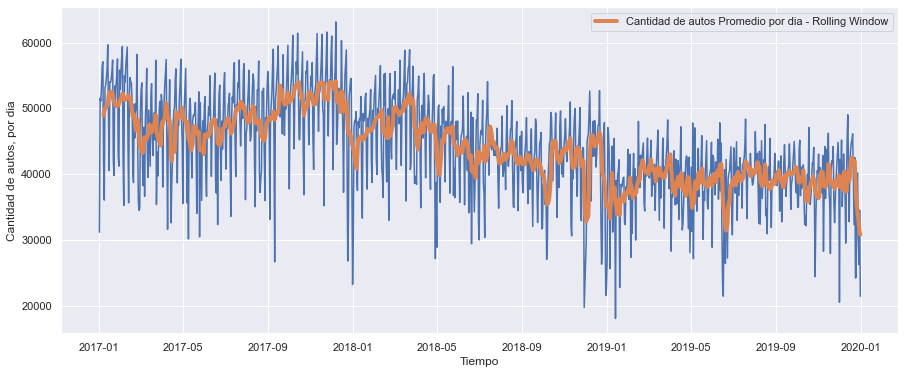

In [28]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.plot(tendencia_semanal, lw = 4, label = 'Cantidad de autos Promedio por dia - Rolling Window')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.legend()
plt.show()

Descompongo a la serie original restandole la tendencia y asi obteniendo el resto

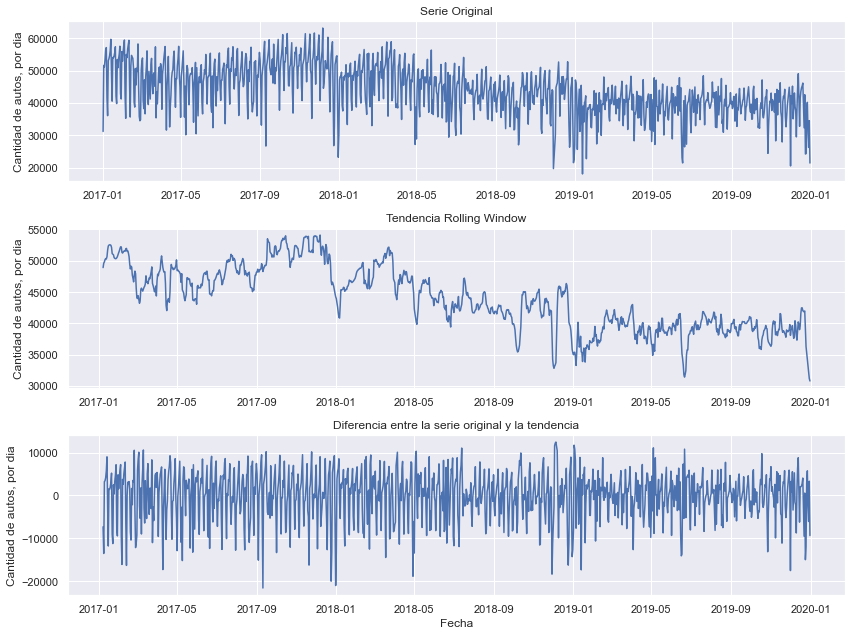

In [29]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(tendencia_semanal)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - tendencia_semanal)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por dia')

plt.tight_layout()
plt.show()

1.12.1.2 Metodología manual: Obtendremos la Tendencia a través de la media movil semanal, metodología multiplicativa (Tendencia * Estacionalidad * Ruido)

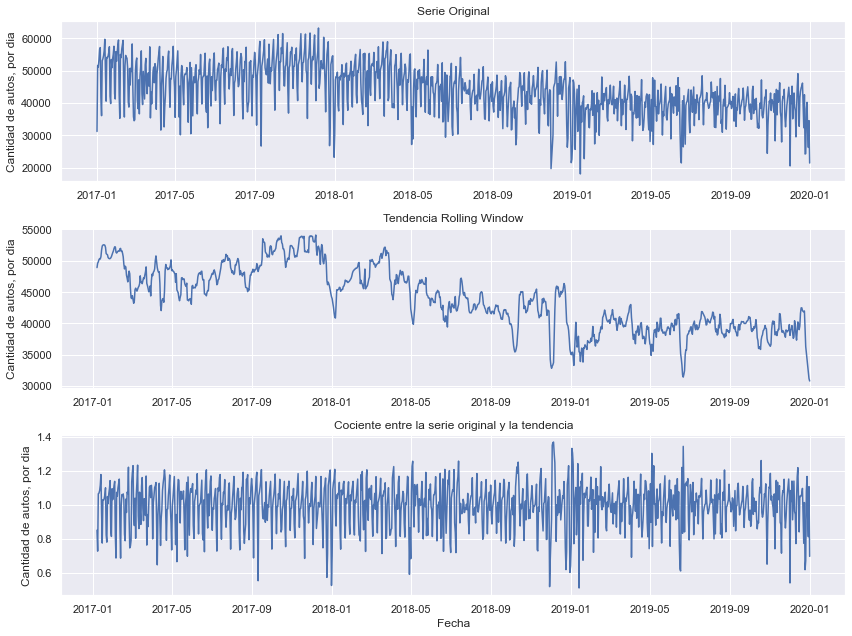

In [30]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(tendencia_semanal)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,3)
plt.title('Cociente entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos / tendencia_semanal)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por dia')

plt.tight_layout()
plt.show()

1.12.2 Utilizando librerías

1.12.2.1 Tendencia, Estacionalidad y Ruido: metodología aditiva (Tendencia + Estacionalidad + Ruido)

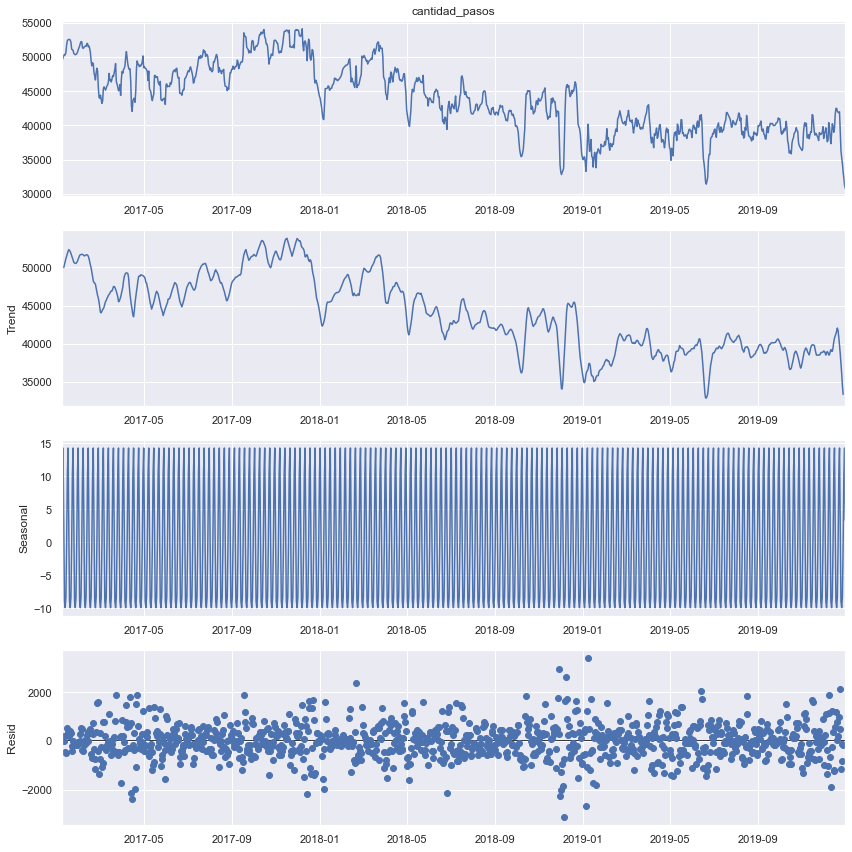

In [31]:
result = seasonal_decompose(tendencia_semanal.dropna(), model='additive')

matplotlib.rcParams['figure.figsize'] = [12,12]

result.plot()
plt.show()

Voy a utilizar esta metodologia para decribir a la serie diaria.

Tomando en consideración a la **tendencia**, se observa una caida en el primer trimestre de 2017 que luego remonta con una tendencia positiva hasta finales del mismo año. En los ultimos dias del año 2017 se ve un desplome fuerte en la serie, que al comienzar el año 2018 recupera en todo el primer trimestre, sin poder llegar a niveles vistos en 2017. 

Una vez finalizado este trimestre, vemos claramente como a partir de ese momento, se ve una tendencia negativa a grandes rasgos con altibajos bastante grandes.

Al observar el año 2019, vemos una pequeña suba a comienzos de año, que luego se mantiene en el tiempo, como si la tendendia fuera nula.

Luego pasando por el gráfico **seasonal**, vemos la variabilidad que otroga este componente a la serie (variabilidad constante).

Por último, vemos que para los **residuos** hay períodos de gran concentración de datos (2018-09) y luego períodos como 2019-01 en donde la variabilidad es grande.

Veremos a continuación un histograma de la serie de residuos y esperamos tenes una distribución similar a la normal

(array([  2.,  10.,  32., 167., 451., 312.,  72.,  32.,   3.,   2.]),
 array([-3144.93249049, -2486.99192433, -1829.05135817, -1171.11079201,
         -513.17022585,   144.77034032,   802.71090648,  1460.65147264,
         2118.5920388 ,  2776.53260496,  3434.47317112]),
 <a list of 10 Patch objects>)

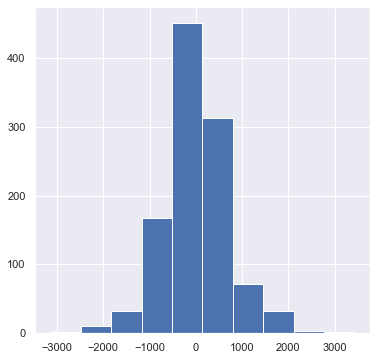

In [32]:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.hist(result.resid)

A modo informativo se detallan las metodologias restantes para descomponer una serie de tiempo:

1.12.2.1 Tendencia, Estacionalidad y Ruido: A través de Statsmodels, que cuenta con muchas herramientas para análisis estadísticos, metodología multiplicativa (Tendencia * Estacionalidad * Ruido)

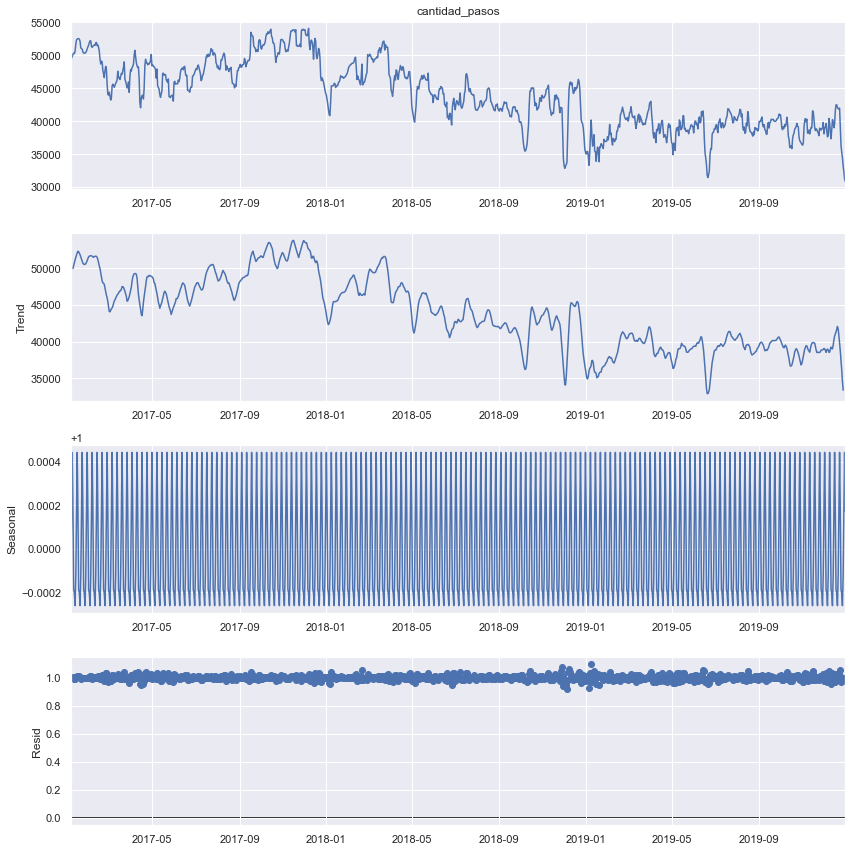

In [33]:
result = seasonal_decompose(tendencia_semanal.dropna(), model='multiplicative')
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

(array([  2.,   6.,  23., 146., 502., 320.,  65.,  16.,   1.,   2.]),
 array([0.91468203, 0.93255373, 0.95042543, 0.96829713, 0.98616883,
        1.00404053, 1.02191223, 1.03978393, 1.05765563, 1.07552734,
        1.09339904]),
 <a list of 10 Patch objects>)

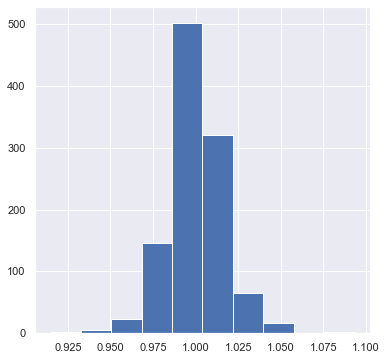

In [34]:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.hist(result.resid)

    1.12.3 Tendencia considerando 15 dias para la media movil
        
        1.12.3.1 Manual, Aditiva:

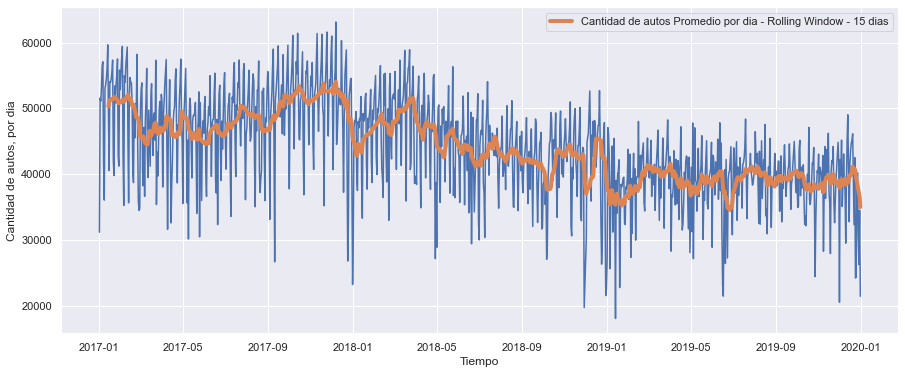

In [35]:
ventana = int(365*2/(52))
tendencia_15d = diario.cantidad_pasos.rolling(window=ventana, center = False).mean()
tendencia_15d
matplotlib.rcParams['figure.figsize'] = [12,12]

plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.plot(tendencia_15d, lw = 4, label = 'Cantidad de autos Promedio por dia - Rolling Window - 15 dias' )
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.legend()
plt.show()

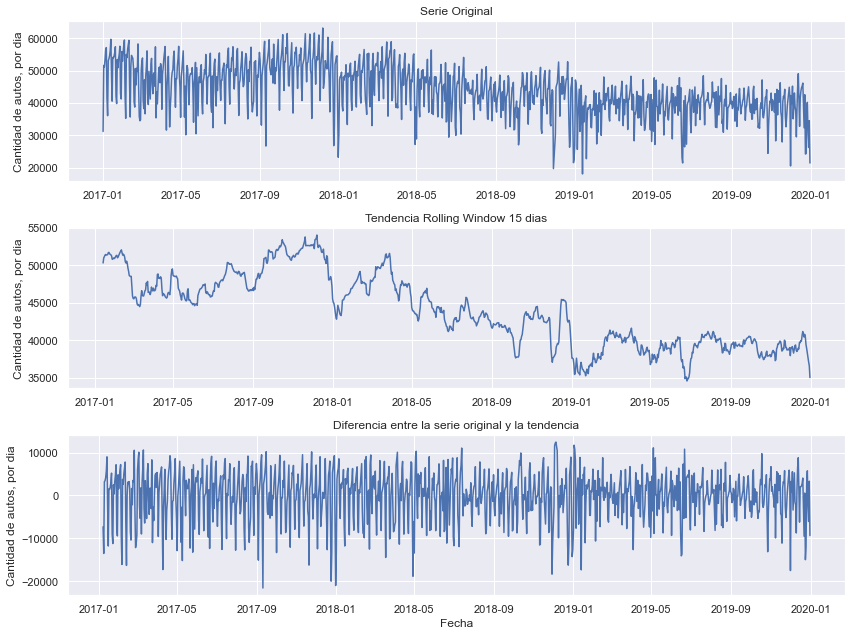

In [36]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window 15 dias')
plt.plot(tendencia_15d)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - tendencia_semanal)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por dia')

plt.tight_layout()
plt.show()

        1.13.3.2 Manual, Multiplicativa

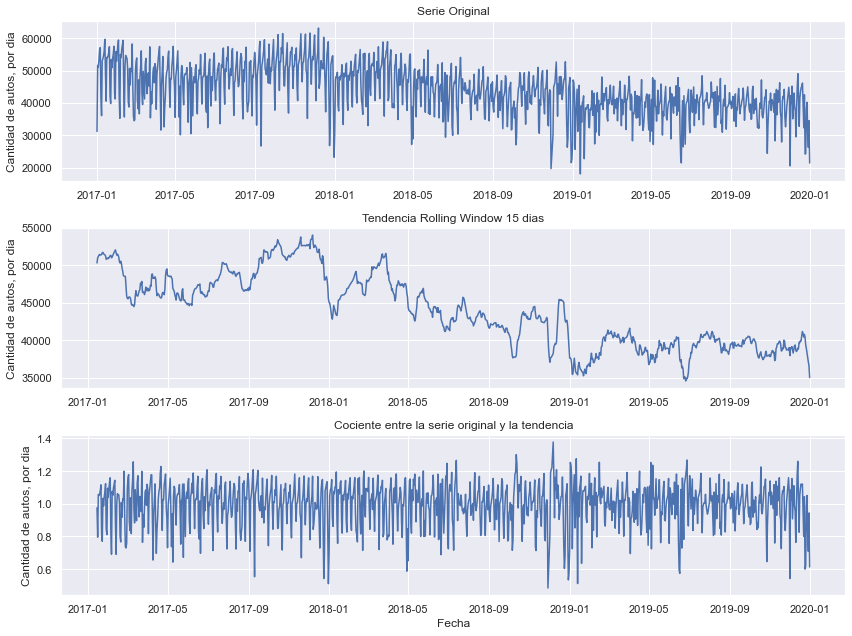

In [37]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window 15 dias')
plt.plot(tendencia_15d)
plt.ylabel('Cantidad de autos, por dia')

plt.subplot(3,1,3)
plt.title('Cociente entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos / tendencia_15d)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por dia')

plt.tight_layout()
plt.show()

        1.13.3.3 Statsmodels, aditiva

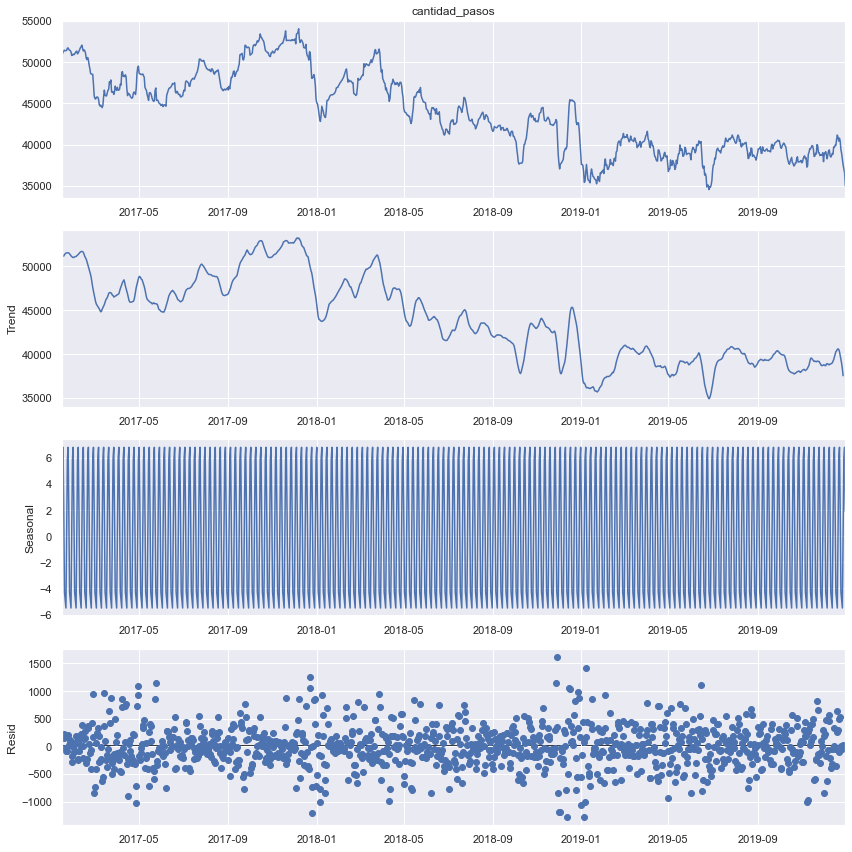

In [38]:
result = seasonal_decompose(tendencia_15d.dropna(), model='additive')

result.plot()
plt.show()

(array([ 10.,  28.,  77., 247., 401., 217.,  61.,  26.,   7.,   2.]),
 array([-1285.18324949,  -994.20976022,  -703.23627096,  -412.26278169,
         -121.28929243,   169.68419684,   460.6576861 ,   751.63117537,
         1042.60466464,  1333.5781539 ,  1624.55164317]),
 <a list of 10 Patch objects>)

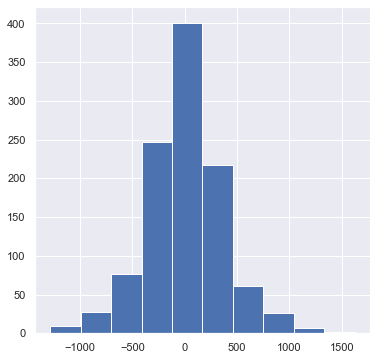

In [39]:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.hist(result.resid)

        1.13.3.3 Statsmodels, multiplicativa

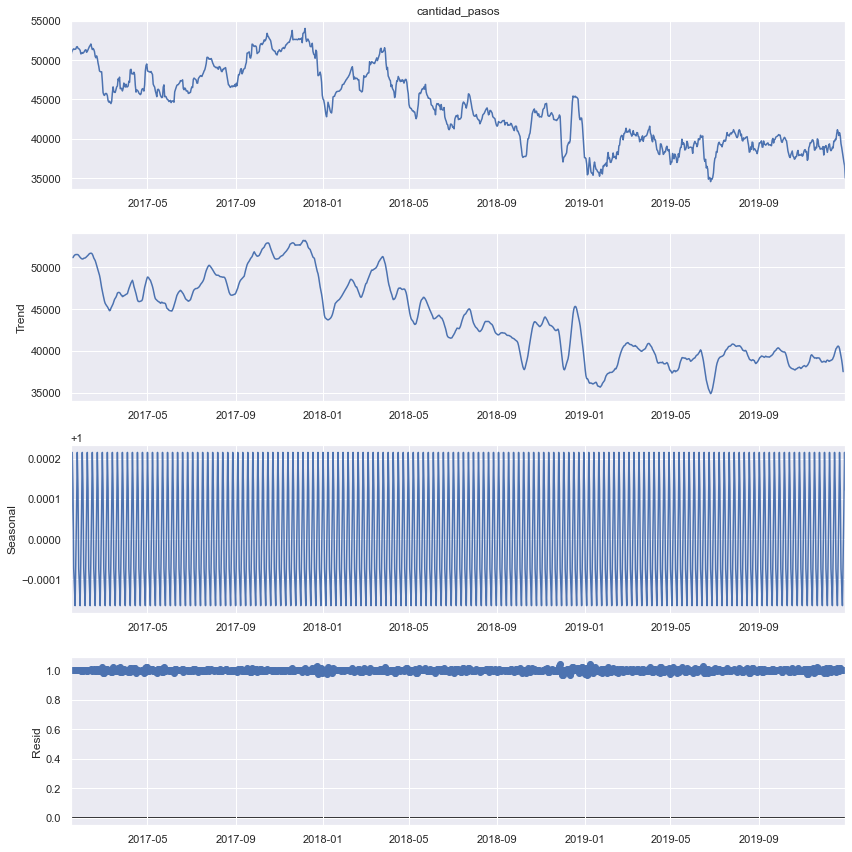

In [40]:
result = seasonal_decompose(tendencia_15d.dropna(), model='multiplicative')
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

(array([  5.,  12.,  60., 161., 455., 262.,  86.,  28.,   5.,   2.]),
 array([0.96503969, 0.9724745 , 0.9799093 , 0.98734411, 0.99477892,
        1.00221372, 1.00964853, 1.01708334, 1.02451814, 1.03195295,
        1.03938776]),
 <a list of 10 Patch objects>)

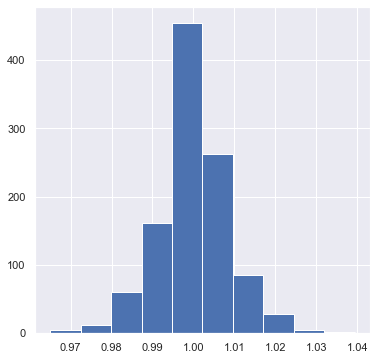

In [41]:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.hist(result.resid)

1.14 Autocorrelación

    1.14.1 Generamos un gráfico que exprese a la variable frente a la observación anterior

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


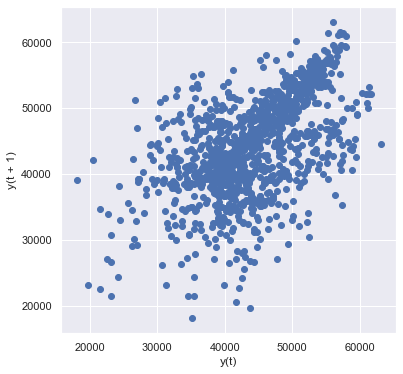

In [42]:
pd.plotting.lag_plot(diario, lag=1)

1.14.2 Cuando se quiere analizar la serie de tiempo es necesario identificar la estructura que la genera, es decir cómo influyen las observaciones del pasado en las observaciones del futuro. Para identificar esta dependencia utilizamos dos fuentes de información, la Función de Autocorrelación Simple (FAS) y la Función de Autocorrelación Parcial (FAP), a saber: 
    
* Función de Autocorrelación Simple (FAS): La función de autocorrelación simple se una serie proporciona la estructura de dependencia lineal de la misma.
    Si denominamos zt a la serie temporal, los valores que se observan van a ser:
        z1, z2, ..., zt−2, zt−1, zt, zt+1, ...
        
    Donde z1 representa el primer valor de la serie, z2 el segundo, y zt será el valor actual de la serie.
    De este modo zt+1 representa el valor de la serie para próximo periodo, es decir un valor futuro.
    
    Si denominamos z1 influye sobre z2 como z1 -> z2, la función de autocorrelación simple tiene por objetivo estudiar cómo se influyen las diversas observaciones:
    
    z1 -> z2 -> ... -> zt−1 -> zt -> zt+1 -> ...
    
    La idea de la función de autocorrelación es proporcionar el coeficiente de correlación entre las observaciones separadas un número determinado de periodos. Así la FAS, va a ser una sucesión de números
    
    p1,p2, ...,  pk, ...

    que representan cómo influye una observación sobre la siguiente (p1), sobre la segunda posterior (p2) o sobre la k periodos posterior (pk).

    Los coeficientes de la FAS, p1, p2, ..., pk están acotados entre [−1,+1]. 

        * Cuando un pi vale cero, quiere decir que no existe efecto entre una observación y la i posiciones posterior.
        * Si pi es próximo a 1 indica que hay mucha relación entre una observación y la i posiciones posterior, y que esa relación es positiva.
        * Si pi es próximo a -1 indica que hay mucha relación entre una observación y la i posiciones posterior, y que esa relación es negativa.

    La FAS proporciona cómo una observación influye sobre las posteriores.

    Este gráfico puede llamar tambien como correlograma.

Text(0.5, 0, 'lag')

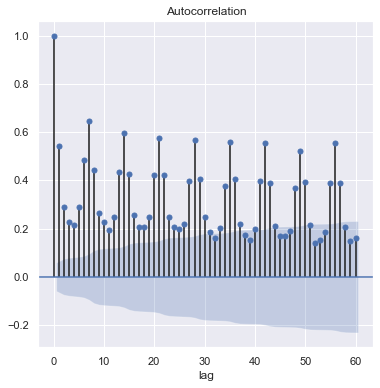

In [43]:
plot_acf(diario, lags=60)
plt.xlabel('lag')

* Como puede observarse la función de autocorrelación proporciona los coeficientes de correlación de la serie consigo misma -de ahí el nombre de Autocorrelación- para distintos retardos. 
    
    Es el caso de la figura, se ve que los coeficientes (o palos de la función) son significativos para casi todos los retardos. Las bandas mas oscuras que se observan en la figura proporcionan los límites para considerar significativo un retardo. Es decir si un palo está dentro de las bandas lo consideraremos no significativo en general. 
    
    La FAS tiene un problema, y es que si por ejemplo p1 es distinto de cero, entonces

    z1 -> z2 -> ... -> zt−1 -> zt -> zt+1 -> ...

    es decir existe una cadena de influencia separada por un retardo. Pero si z1 -> z2 y z2 -> z3, entonces z1 -> z3. Por tanto, la FAS en general, si p1 es distinto de cero, encontrará que p2,p3,... etc, serán distintos de cero.
    Sin embargo es necesario distinguir entre varias cadenas de influencia posibles:
    
    * La cadena de influencia general, a través de p1.
    * Las cadenas de influencia directa. Es decir cómo influye z1 sobre z3 directamente, es decir SIN PASAR A TRAVÉS DE z2.

    Para resolver este problema se construye la Función de Autocorrelación Parcial.

* Función de Autocorrelación Parcial (FAP): proporciona la relación directa que existe entre observaciones separadas por k retardos. 
    Esta es una información muy valiosa sobre la estructura de la serie, ya que elimina el problema que presentaba la función de autocorrelación simple de que si z1 -> z2 y z2 -> z3, entonces z1 -> z3. 
    En la función de autocorrelación simple, el primer palo (relación entre z1 y z2 o z2 y z3) será significativo. Y el segundo también, ya que si z1 -> z2 y z2 -> z3, entonces z1 -> z3. 
    En la FAP, esto no ocurre. el primer palo, será significativo, y el segundo no lo será.

Text(0.5, 0, 'lag')

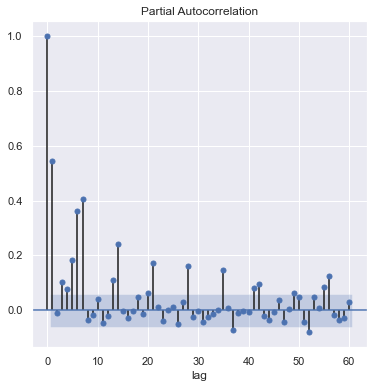

In [44]:
plot_pacf(diario, lags= 60)
plt.xlabel('lag')

Si los valores se encuentran fuera de las zonas mas oscuras, quiere decir que con un 95% de confianza, podemos afirmar que existe dependencia de la variable en el tiempo o autocorrelación. Esto implica que se trata de una serie **no estacionaria en media**.

Para corroborar esto, planteamos el siguiente test estadistico:

#### La prueba de Dickey-Fuller Aumentada

Es un tipo de prueba estadística llamada prueba de raíz unitaria. La intuición detrás de la prueba de raíz unitaria es que determina cuán fuertemente una serie de tiempo está definida por una tendencia.

Utiliza un modelo autorregresivo y optimiza un criterio de información a través de múltiples valores de retraso diferentes.
El procedimiento para la prueba de ADF es la misma que para la prueba de Dickey-Fuller pero se aplica al modelo:

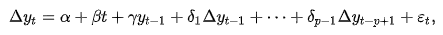

donde $\alpha$  es una constante, $\beta$ el coeficiente sobre una tendencia temporal y $p$ el orden de retraso del proceso autorregresivo. 

* **Hipótesis nula (H0)**: Si se acepta, sugiere que la serie de tiempo tiene una raíz unitaria, lo que significa que no es estacionaria. Tiene una estructura dependiente del tiempo.

* **Hipótesis Alternativa (H1)**: La hipótesis nula es rechazada; sugiere que la serie de tiempo no tiene una raíz unitaria, lo que significa que es estacionaria. No tiene una estructura dependiente del tiempo
estructura.

Interpretamos este resultado usando el valor p de la prueba.

* **Valor p > 0,05**: Aceptamos la hipótesis nula (H0), el dato tiene una raíz unitaria y no es estacionario.
* **Valor p ≤ 0,05**: Rechazar la hipótesis nula (H0), el dato no tiene una raíz unitaria y es estacionario.

La librería Statsmodels provee la función adfuller() que realiza el test:

In [45]:
result = adfuller(diario.cantidad_pasos.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.752326
p-value: 0.404374
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Comparando el p-value de la prueba con 0.05, indica que tendríamos que aceptar la hipótesis nula que la serie de tiempo no es estacionaria y tiene una estructura dependiente del tiempo.

Por este motivo, si queremos realizar estimaciones con modelos tipo ARIMA (Modelos AutoRegresivos Integrados de Media Moviles), debemos transformar la serie tomando diferencias entre la variable en el momento t y la variable en el momento t-1, ya que para realizar estimaciones sobre series de tiempo debemos trabajar con series estacionarias en media:

In [46]:
result = adfuller(diario.cantidad_pasos.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.512394
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


La serie diferenciada nos devuelve valores para este test que indican que tendríamos que aceptar la hipótesis alternativa que la serie de tiempo es estacionaria en media.

Text(0.5, 0, 'lag')

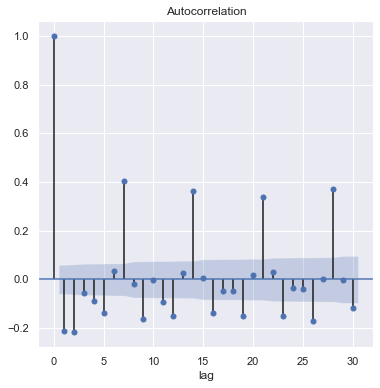

In [47]:
plot_acf(diario.diff(1).dropna(), lags=30)
plt.xlabel('lag')

Graficamos como quedaría la serie diferenciada

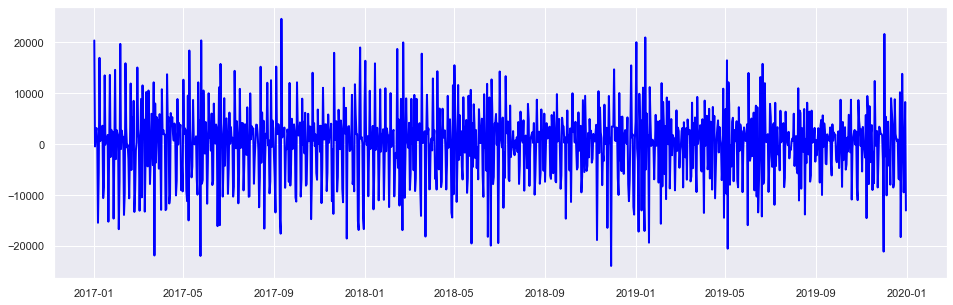

In [48]:
matplotlib.rcParams['figure.figsize'] = [16,5]
plt.plot(diario.index, diario.cantidad_pasos.diff(),
         color='blue', lw=2, label="train")

## Parte B - Predicción a Futuro (Machine Learning)

#### Consigna: Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.

* Tomaremos como métrica para comparar los modelos a desarrollar, a la Raíz del  Error Cuadrático Medio (RMSE).
* Intentaremos predecir la cantidad de pasos diarios en la autopista Illia que sean pagos en efectivo con la información histórica de los pasos bajo esta condición.

2.1 Metodología de "Estimar el valor futuro repitiendo el valor observado hoy" (Banchmark):

En primer lugar, separamos a la serie en entrenamiento y test, y graficamos

Observations: 1095
Training Observations: 973
Testing Observations: 122


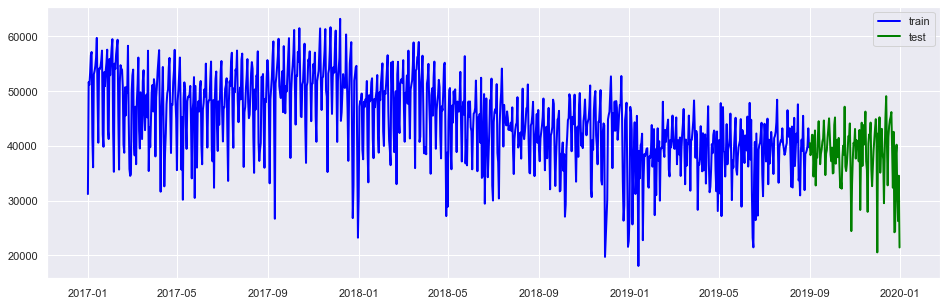

In [49]:
diario.cantidad_pasos = diario.cantidad_pasos.dropna()
train_size = int(len(diario.cantidad_pasos) * 0.889)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train.index, train.cantidad_pasos,
         color='blue', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='green', lw=2, label="test")
plt.legend()
plt.show()

Aqui en la variable "look_back" tomo la cantidad de dias hacia atrás que mirará mi modelo de One-Step prediction realizar la estimación. Además separo a mis valores input para el modelo (X) de mi output (y) 

In [50]:
look_back = 90 # usamos 90 datos para predecir el valor siguiente

N = diario.cantidad_pasos.shape[0]

X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]

N_train = len(train.cantidad_pasos) - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = len(test.cantidad_pasos) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(883, 90) (883,)
(121, 90) (121,)


Verifico que  las fechas de mi entrenamiento sean correctas, ya que lo que estoy buscando es que estime el ultimo trimestre del año 2019.

In [51]:
diario.cantidad_pasos.index[N_train+look_back: length_total]

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='fecha', length=122, freq='D')

Realizo la estimación y luego grafico la serie original y a la estimada

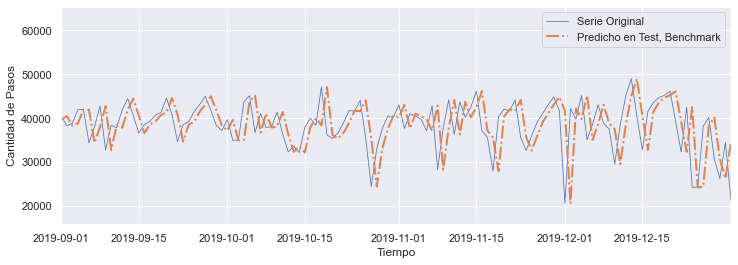

In [52]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

plt.figure(figsize=(12,4))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(diario.cantidad_pasos.index[N_train+look_back], diario.cantidad_pasos.index[length_total-1])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

Calculo el RMSE del modelo benchmark que me servirá para realizar comparaciones.

In [53]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 2]
MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print('Error en Test en Benchmark:',np.sqrt(MSE))

Error en Test en Benchmark: 6220.128589460309


    2.2 One-Step Prediction

One-step prediction es la metodología de estimar valores utilizando una cantidad predeterminada de observaciones anteriores para entrenar nuestro modelo. Entonces, nuestro dataset tendrá el siguiente formato: 

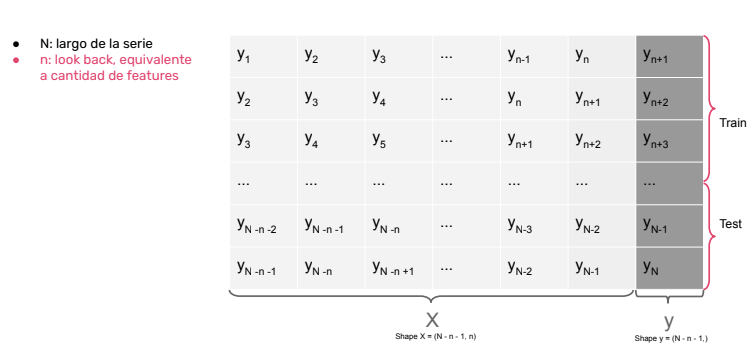
* Imagen tomada de la bibliografía de la carrera de Data Science en Acámica

Vamos a entrenar un RandomForestRegressor para predecir el siguiente valor en la serie de tiempo diaria de pasos en efectivo para la estación Illia. Utilizaremos datos desde 2017-01-01 hasta 2019-08-31 como conjunto de entrenamiento. Y el último trimestre del 2019 como test.

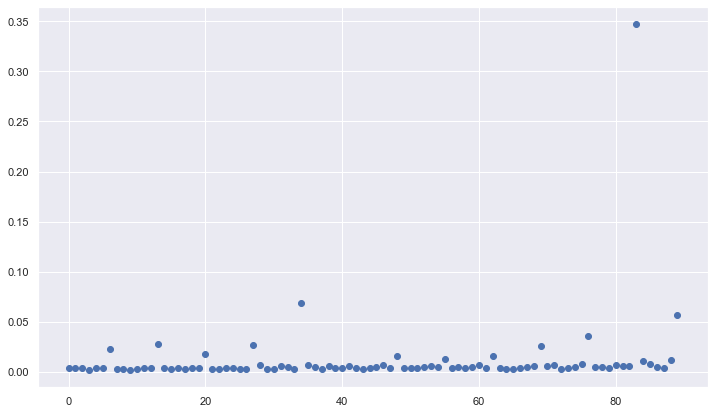

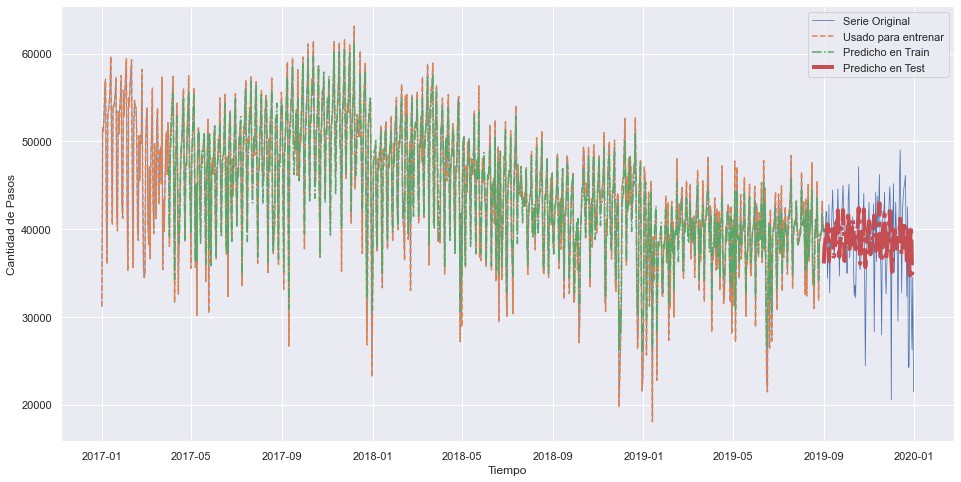

In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1).fit(X_train,y_train)

plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)

y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

Calculo el RMSE observado para este modelo y noto una mejora significativa para realizar estimaciones comparado con mi modelo de benchmark

In [55]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1782.084303782733
Error en Test: 4398.862895314608


# Este es el modelo ganador del Proyecto 03

El modelo RandomForestRegressor fue aquél que minimizó el RMSE para el último trimestre de 2019.

    2.3 Multi-Step Prediction
    
La metodología en este caso cambia, ya que la estructura es la siguiente: 

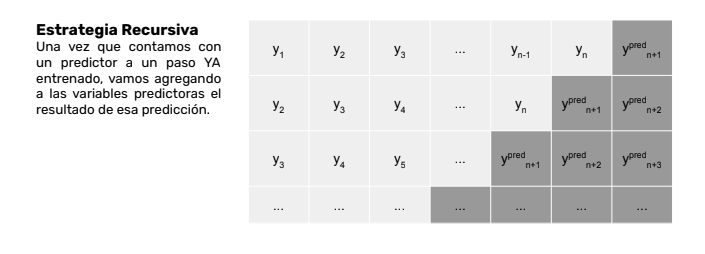
* Imagen tomada de la bibliografía de la carrera de Data Science en Acámica

En este caso, nuestra estimacion en t pasa a ser input par ael estimación en t+1.

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [56]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

Graficamos a la serie observada y estimada tanto para train, como para test

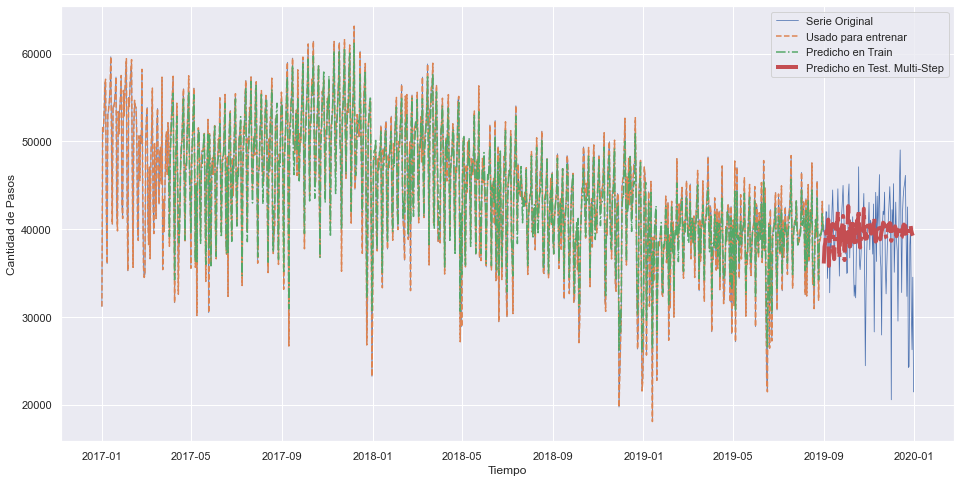

In [57]:
plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

Calculo nuevamente el error cuadrático medio para compararlo con el modelo de One-step (el mejor hasta este momento) y noto un error mayor.

In [58]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 4926.295891803936


    2.3 Metodología Prophet
    
Esta librería desarrollada por Facebook, busca estudiar los componentes de nuestras series temporales. Incluye dentro de sus algoritmos modelos de predicción, de detección de anomalías, análisis de estacionalidad para distintas granularidades temporales, estudios de tendencia, entre muchas otras opciones.

Tiene una funcionalidad muy interesante para graficar las distintas partes de nuestra serie de tiempo, incluyendo una predicción con intervalos de confianza

Para realizar estimaciones con esta librería debemos tranformar un poco nuestros datos, cambiando el nombre de las columnas

In [59]:
diario["ds"] = diario.index
diario["y"] = diario.cantidad_pasos

diario.drop(["cantidad_pasos"],axis=1, inplace=True)
diario.reset_index(drop=True, inplace=True)
diario

ds        y
0    2017-01-01  31183.0
1    2017-01-02  51568.0
2    2017-01-03  51093.0
3    2017-01-04  53332.0
4    2017-01-05  56486.0
...         ...      ...
1090 2019-12-27  40182.0
1091 2019-12-28  30681.0
1092 2019-12-29  26259.0
1093 2019-12-30  34523.0
1094 2019-12-31  21447.0

[1095 rows x 2 columns]

Busco cual es el indice que separa mi train de test para re-armarlos con estas columnas

In [60]:
diario[diario.ds == "2019-08-31"]

ds        y
972 2019-08-31  39703.0

Separo train y test

In [61]:
train = diario.loc[:972,:]
test = diario.loc[973:,:]

Genero al modelo y lo entreno

In [62]:
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True)
prophet.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Realizo las predicciones

In [63]:
y_train_pred = prophet.predict(train)
y_test_pred = prophet.predict(test)
y_train = train["y"]
y_test = test["y"]

Calculo el RMSE para este modelo y observo que el modelo de One-step tiene un error menor  

In [64]:
MSE_tr = mean_squared_error(y_train, y_train_pred["yhat"])
print('Error en Train:',np.sqrt(MSE_tr))

MSE_te = mean_squared_error(y_test, y_test_pred["yhat"])
print('Error en Test:',np.sqrt(MSE_te))

Error en Train: 4692.623644402622
Error en Test: 5730.330223173638


Grafico a la serie observada y predicha en entrenamiento

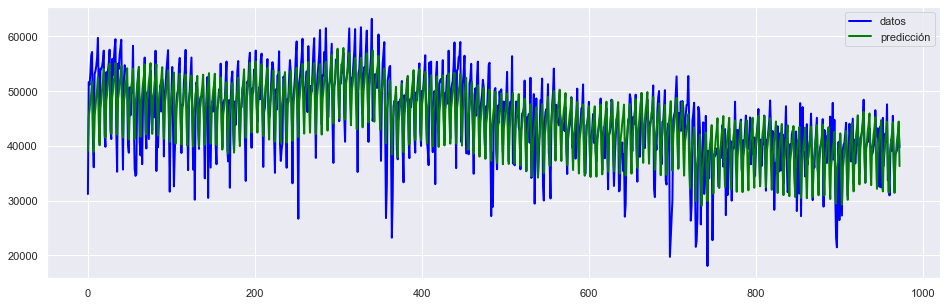

In [65]:
plt.plot(y_train.index, y_train,
         color='blue', lw=2, label="datos")
plt.plot( y_train_pred.index,  y_train_pred["yhat"],
         color='green', lw=2, label="predicción")
plt.legend()
plt.show()

Lo mismo para test

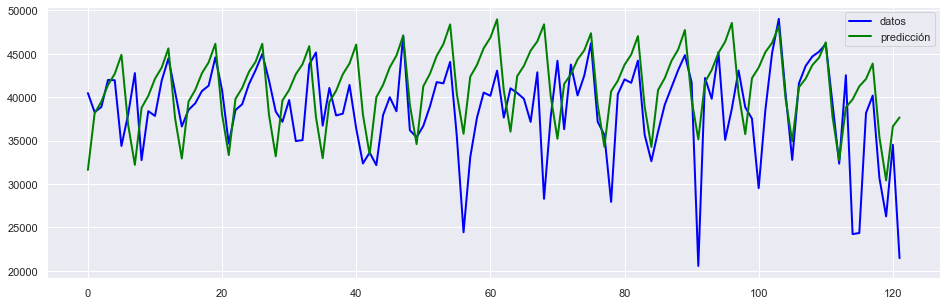

In [66]:
plt.plot(y_test_pred.index, y_test,
         color='blue', lw=2, label="datos")
plt.plot(y_test_pred.index,  y_test_pred["yhat"],
         color='green', lw=2, label="predicción")
plt.legend()
plt.show()

2.4 One-step Prediction optimizada mediante GridSearchCV:
    
* Debemos tener a consideración que la implementación de Cross-Validation tal y como la conocemos no es recomendable aplicarla (tomar valores aleatorios dentro de nuestra data de train). En series de tiempo esta toma de valores debe ser secuencial ya que el tiempo vital en nuestro analisis.
* En Python solucionamos este problema mediante la metodo dentro de sklearn.model_selection llamada TimeSeriesSplit.    

Debo modificar nuevamente a la serie para que sea aplicable al modelo One-step

Observations: 1095
Training Observations: 973
Testing Observations: 122


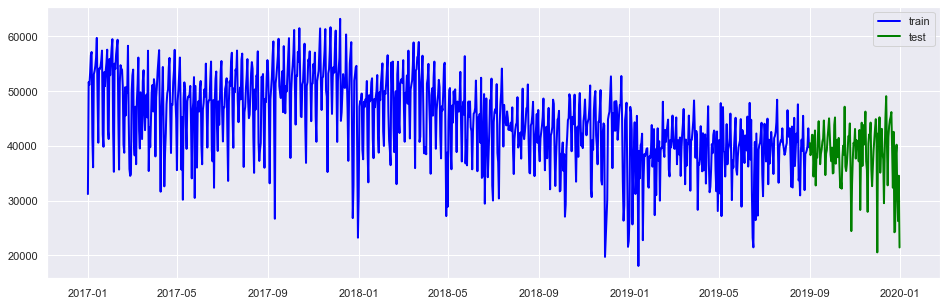

In [67]:
diario["cantidad_pasos"] = diario.y
diario.index= diario.ds
diario.drop(["ds","y"], axis=1, inplace=True)

train_size = int(len(diario.cantidad_pasos) * 0.889)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train.index, train.cantidad_pasos,
         color='blue', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='green', lw=2, label="test")
plt.legend()
plt.show()

Rearmo el look back y el dataset con formato one-step

In [68]:
look_back = 90 # usamos 90 datos para predecir el valor siguiente

N = diario.cantidad_pasos.shape[0]

X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]

N_train = len(train.cantidad_pasos) - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = len(test.cantidad_pasos) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(121, 90) (121,)


Genero el vector de hiperparámetros para realizar el Gridsearch y armo la separación con TimeSeriesSplit para el cross-validation

In [69]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 
                    'max_depth': [None,1, 2, 3], 
                    'min_samples_split': [1, 2, 3, 4, 5]}

tscv = TimeSeriesSplit(n_splits=10)

clf = GridSearchCV(RandomForestRegressor(random_state=42), tuned_parameters, cv=tscv, n_jobs=-1, verbose=1)

clf.fit(X_train, y_train)

print(clf.best_estimator_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.2min finished


RandomForestRegressor(min_samples_split=3, n_estimators=700, random_state=42)


Genero las predicciones de este modelo y paso a graficar a la serie predicha y observada tanto para train como para test

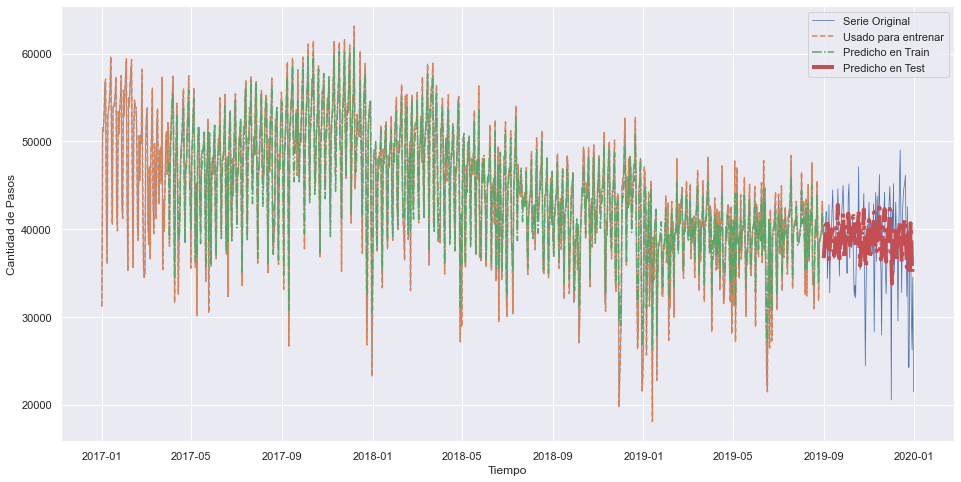

In [70]:
y_pred = clf.predict(X)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

Calculo el RMSE bajo este modelo

In [71]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1809.5231820137071
Error en Test: 4410.220395874984


Grafico a la serie estimada y observada para el test

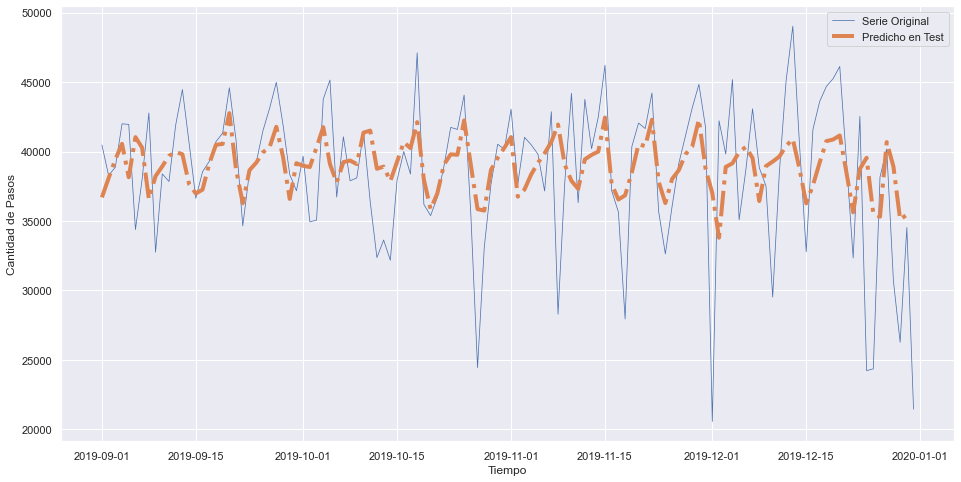

In [72]:
plt.figure(figsize=(16,8))
plt.plot(test.index[:length_total],test[:length_total],lw = 0.75, label = 'Serie Original')
#plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
#plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

2.4.2 Realizaré la misma estimación pero con una ventana mayor

In [73]:
look_back = 120 # usamos 120 datos para predecir el valor siguiente

N = diario.cantidad_pasos.shape[0]

X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]

N_train = len(train.cantidad_pasos) - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = len(test.cantidad_pasos) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(121, 120) (121,)


Genero el vector de hiperparámetros para realizar el Gridsearch y armo la separación con TimeSeriesSplit para el cross-validation

In [74]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 
                    'max_depth': [None,1, 2, 3], 
                    'min_samples_split': [1, 2, 3, 4, 5]}

tscv = TimeSeriesSplit(n_splits=10)

clf = GridSearchCV(RandomForestRegressor(random_state=42), tuned_parameters, cv=tscv, n_jobs=-1, verbose=1)

clf.fit(X_train, y_train)

print(clf.best_estimator_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 11.9min finished


RandomForestRegressor(min_samples_split=5, n_estimators=1000, random_state=42)


Genero las predicciones de este modelo y paso a graficar a la serie predicha y observada tanto para train como para test

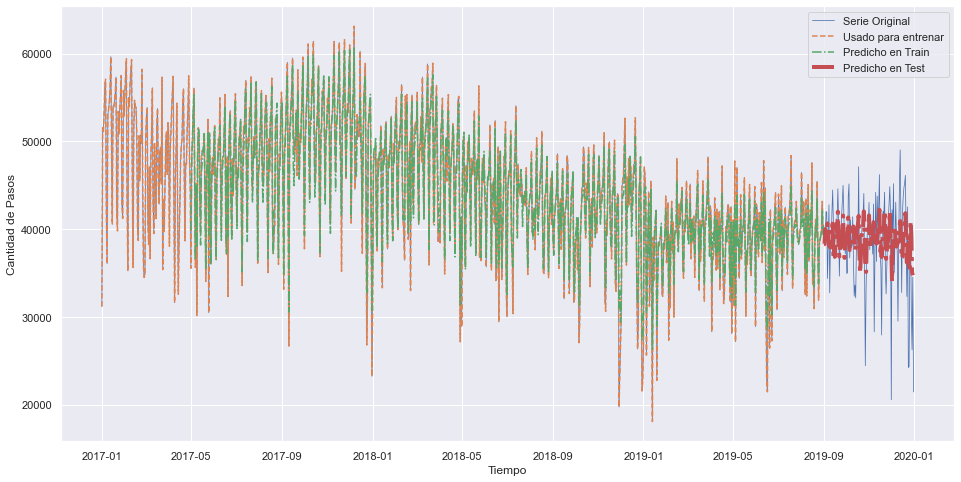

In [75]:
y_pred = clf.predict(X)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

Calculo el RMSE bajo este modelo

In [76]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1926.465428154471
Error en Test: 4428.837868945601


Grafico a la serie estimada y observada para el test

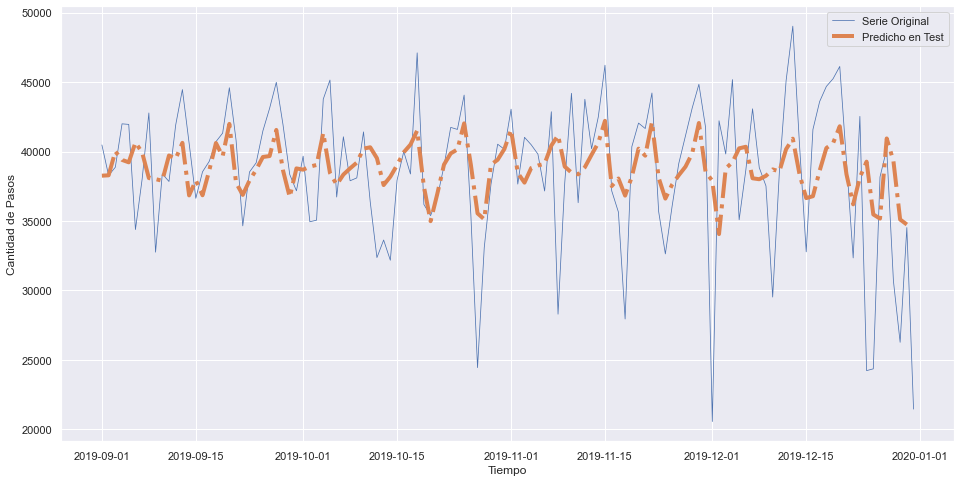

In [77]:
plt.figure(figsize=(16,8))
plt.plot(test.index[:length_total],test[:length_total],lw = 0.75, label = 'Serie Original')
#plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
#plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

2.5 Estimación mediante Prophet, tomando logaritmo a los datos para disminuir posible heterocedasticidad (explicado mas adelante).

Aqui reorganizo a la base para la estimación mediante Prophet, rearmo train y test y entreno al modelo

In [78]:
diario["ds"] = diario.index
diario["y"] = np.log(diario.cantidad_pasos)

diario.drop(["cantidad_pasos"],axis=1, inplace=True)
diario.reset_index(drop=True, inplace=True)

train = diario.loc[:972,:]
test = diario.loc[973:,:]

prophet = Prophet()
prophet.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
diario.loc[:972,:]

ds          y
0   2017-01-01  10.347628
1   2017-01-02  10.850657
2   2017-01-03  10.841403
3   2017-01-04  10.884292
4   2017-01-05  10.941748
..         ...        ...
968 2019-08-27  10.565144
969 2019-08-28  10.576611
970 2019-08-29  10.596285
971 2019-08-30  10.672762
972 2019-08-31  10.589182

[973 rows x 2 columns]

Realizo las predicciones y calculo el error bajo esta metodología

In [80]:
y_train_pred = prophet.predict(train)
y_test_pred = prophet.predict(test)
y_train = train["y"]
y_test = test["y"]

MSE_tr = mean_squared_error(np.exp(y_train), np.exp(y_train_pred["yhat"]))
print('Error en Train:',np.sqrt(MSE_tr))

MSE_te = mean_squared_error(np.exp(y_test), np.exp(y_test_pred["yhat"]))
print('Error en Test:',np.sqrt(MSE_te))

Error en Train: 4535.002181004435
Error en Test: 5229.350179728585


2.6 Estimación mediante One-step Prediction optimizada mediante GridSearchCV y tomando logaritmo a los datos.

Observations: 1095
Training Observations: 973
Testing Observations: 122


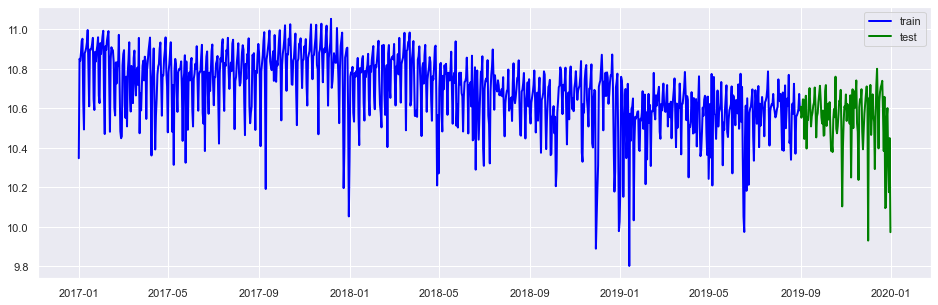

In [81]:
diario["cantidad_pasos"] = diario.y
diario.index= diario.ds
diario.drop(["ds","y"], axis=1, inplace=True)

train_size = int(len(diario.cantidad_pasos) * 0.889)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train.index, train.cantidad_pasos,
         color='blue', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='green', lw=2, label="test")
plt.legend()
plt.show()

In [82]:
look_back = 60 # usamos dos meses de datos para predecir el valor siguiente

N = diario.cantidad_pasos.shape[0]

X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]

N_train = len(train.cantidad_pasos) - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = len(test.cantidad_pasos) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(121, 60) (121,)


Genero el vector de hiperparámetros para realizar el Gridsearch y armo la separación con TimeSeriesSplit para el cross-validation

In [83]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 
                    'max_depth': [None, 1, 2, 3], 
                    'min_samples_split': [1, 2, 3]}

tscv = TimeSeriesSplit(n_splits=10)

clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=tscv, n_jobs=-1, verbose=1)

clf.fit(X_train, y_train)

print(clf.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.0min finished


RandomForestRegressor(min_samples_split=3, n_estimators=1000)


Genero las predicciones de este modelo y paso a graficar a la serie predicha y observada tanto para train como para test

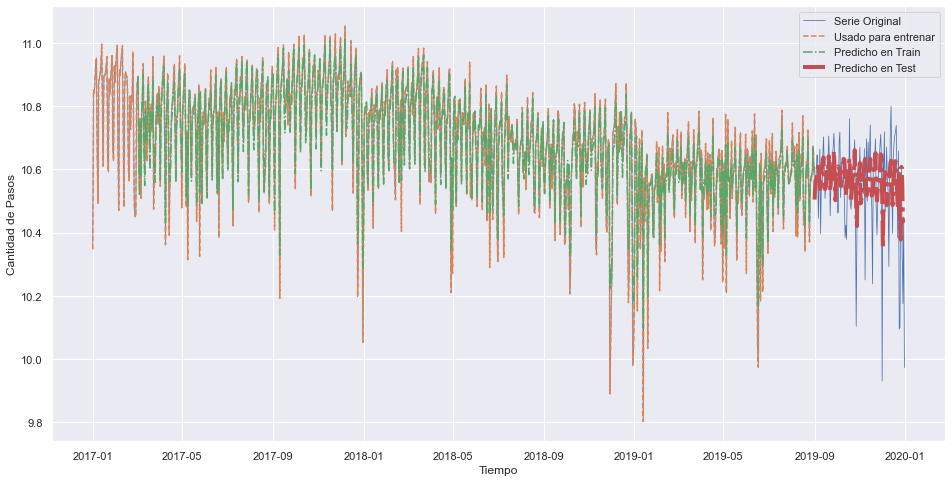

In [84]:
y_pred = clf.predict(X)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

Calculo el RMSE

In [85]:
MSE = mean_squared_error(np.exp(y_train), np.exp(y_train_pred))
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1761.27231023983
Error en Test: 4476.811085808008


Grafico a la serie estimada y real en test

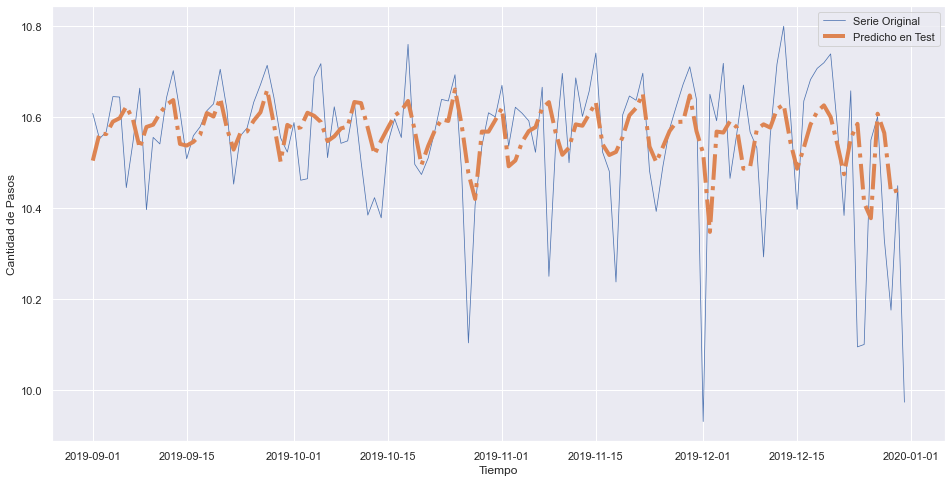

In [86]:
plt.figure(figsize=(16,8))
plt.plot(test.index[:length_total],test[:length_total],lw = 0.75, label = 'Serie Original')
#plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
#plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

La transformación de la serie tomando logaritmos sirve para solucionar el problema de Heterocedasticidad, su definición es la siguiente:
* La heterocedasticidad es, en estadística, cuando los errores no son constantes a lo largo de toda la muestra.
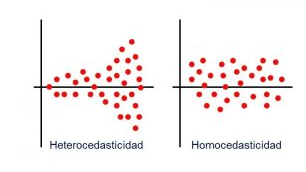

2.7 Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?

Cargo la data del 2020, filtro por los mismos filtros tomados anteriormente, concateno las tablas, interpolo eliminando los valores nulos y grafico a la serie.

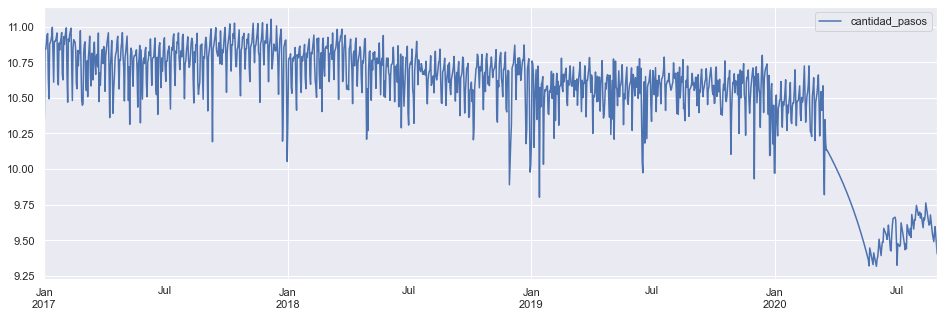

In [87]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask]

data_2020.drop(columns = ['periodo',"dia_fecha",'hora_inicio','forma_pago', 'estacion'], inplace = True)

data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

data_2020.drop(columns=['fecha','hora_fin'], inplace = True)
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 

data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)

data_2020 = data_2020.resample('D', on = 'fecha').sum()
data_2020.cantidad_pasos[data_2020.cantidad_pasos <= 10000] = np.nan
data_2020 = data_2020.interpolate()

data_2020 = np.log(data_2020)


diario = pd.concat([diario, data_2020])

diario.plot()

Separo en Train y Test en donde mi test es el periodo 2020

Observations: 1339
Training Observations: 1095
Testing Observations: 244


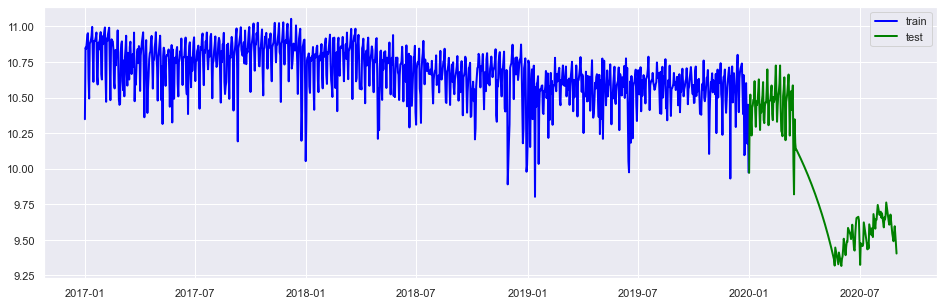

In [88]:
train_size = int(len(diario.cantidad_pasos) * 0.818)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train.index, train.cantidad_pasos,
         color='blue', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='green', lw=2, label="test")
plt.legend()
plt.show()

In [89]:
diario.cantidad_pasos[0:train_size]

2017-01-01    10.347628
2017-01-02    10.850657
2017-01-03    10.841403
2017-01-04    10.884292
2017-01-05    10.941748
                ...    
2019-12-27    10.601174
2019-12-28    10.331399
2019-12-29    10.175764
2019-12-30    10.449381
2019-12-31     9.973340
Name: cantidad_pasos, Length: 1095, dtype: float64

In [90]:
look_back = 60 # usamos dos meses de datos para predecir el valor siguiente

N = diario.cantidad_pasos.shape[0]

X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]


N_train = len(train.cantidad_pasos) - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = len(test.cantidad_pasos) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1035, 60) (1035,)
(243, 60) (243,)


Verifico que las fechas sean correctas

In [91]:
diario.cantidad_pasos.index[N_train+look_back: length_total]

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
               '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
               '2020-08-30', '2020-08-31'],
              dtype='datetime64[ns]', length=244, freq=None)

Aplico el modelo ganador del proyecto 03

Error en Train: 1782.0822744017048
Error en Test: 10768.948276338715


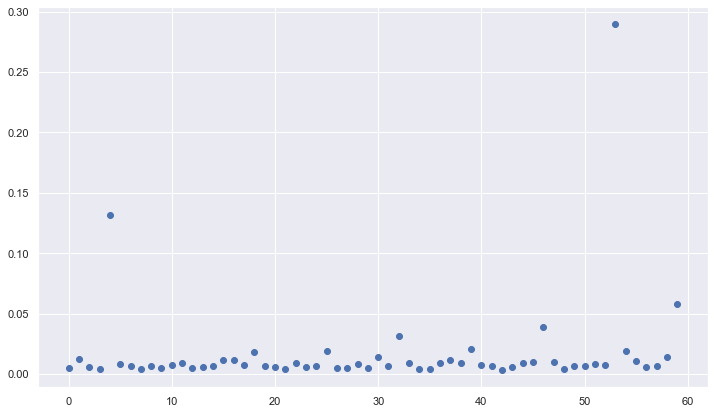

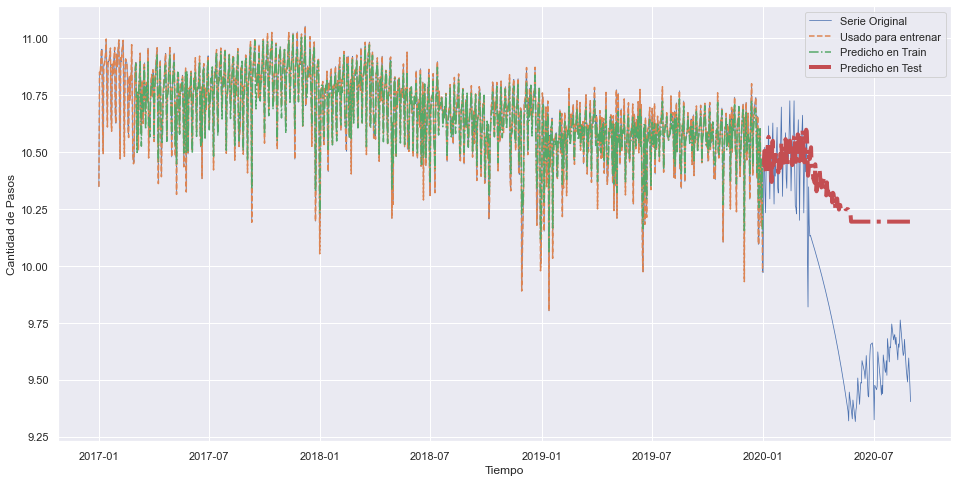

In [92]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1).fit(X_train,y_train)

plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)

y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

MSE = mean_squared_error(np.exp(y_train), np.exp(y_train_pred))
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
print('Error en Test:',np.sqrt(MSE))

plt.figure(figsize=(16,8))
plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[:N_train + look_back], diario.cantidad_pasos[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.cantidad_pasos.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.cantidad_pasos.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

El modelo funciona mal por el gran shock que sufre la serie por el confinamiento para hacer frente al COVID-19. Es muy problable que para realizar estimaciones, hasta no retornar a una situación similar al perpiodo 2017-2019, no sea una buena idea estimar valores en base a valores del pasado.   

2.8 Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

Agrego el período 2016 realizando las mismas acciones que para el período 2020

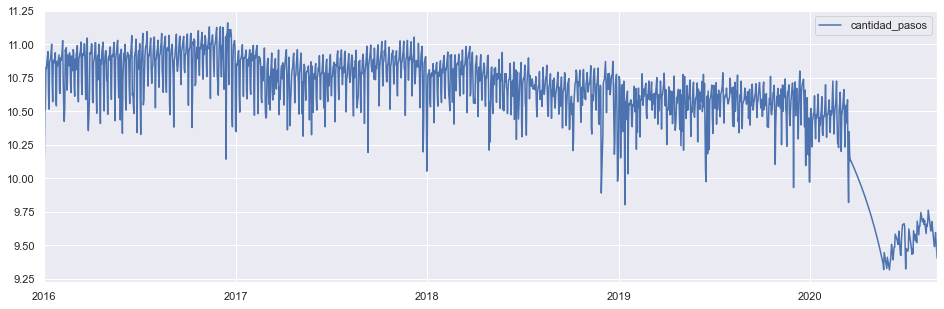

In [93]:
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
mask = np.logical_and(data_2016.estacion=='Illia', data_2016.forma_pago == 'EFECTIVO')
data_2016 = data_2016[mask]

data_2016.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
data_2016['fecha2'] = pd.to_datetime(data_2016.fecha) + pd.to_timedelta(data_2016.hora_fin, unit = 'h')
data_2016.drop(columns=['fecha','hora_fin'], inplace = True)
data_2016.rename(columns = {'fecha2':'fecha'}, inplace = True) 

data_2016.sort_values('fecha', inplace = True)
data_2016.reset_index(drop=True, inplace = True)

data_2016 = data_2016.resample('D', on = 'fecha').sum()

data_2016.cantidad_pasos[data_2016.cantidad_pasos <= 10000] = np.nan
data_2016 = data_2016.interpolate()

data_2016 = np.log(data_2016)


diario = pd.concat([data_2016, diario])

diario.plot()

Observations: 1705
Training Observations: 1461
Testing Observations: 244


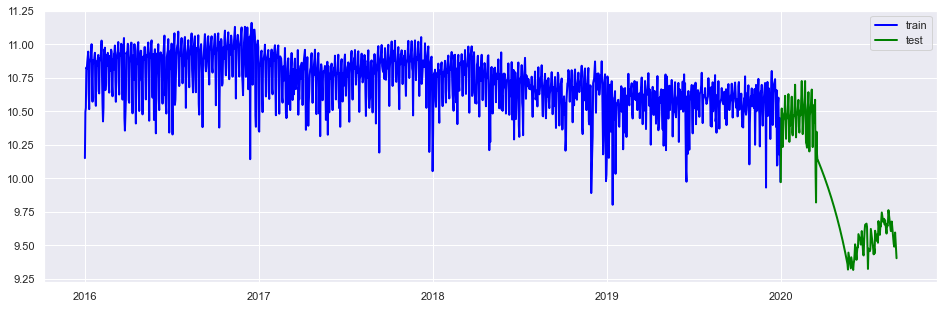

In [94]:
train_size = int(len(diario.cantidad_pasos) * 0.857)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train.index, train.cantidad_pasos,
         color='blue', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='green', lw=2, label="test")
plt.legend()
plt.show()

In [95]:
test

cantidad_pasos
2020-01-01        9.970913
2020-01-02       10.425906
2020-01-03       10.520482
2020-01-04       10.329637
2020-01-05       10.233223
...                    ...
2020-08-27        9.549238
2020-08-28        9.595331
2020-08-29        9.535439
2020-08-30        9.471730
2020-08-31        9.403684

[244 rows x 1 columns]

In [96]:
look_back = 90 # usamos 90 datos para predecir el valor siguiente

N = diario.cantidad_pasos.shape[0]

X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]

N_train = len(train.cantidad_pasos) - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = len(test.cantidad_pasos) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

tuned_parameters = {'n_estimators': [500, 700, 1000], 
                    'max_depth': [None, 1, 2, 3], 
                    'min_samples_split': [1, 2, 3]}

tscv = TimeSeriesSplit(n_splits=10)

clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=tscv, n_jobs=-1, verbose=1)

clf.fit(X_train, y_train)

print(clf.best_estimator_)

(243, 90) (243,)
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  8.3min finished


RandomForestRegressor(n_estimators=500)
Error en Test: 4534.9346283683635


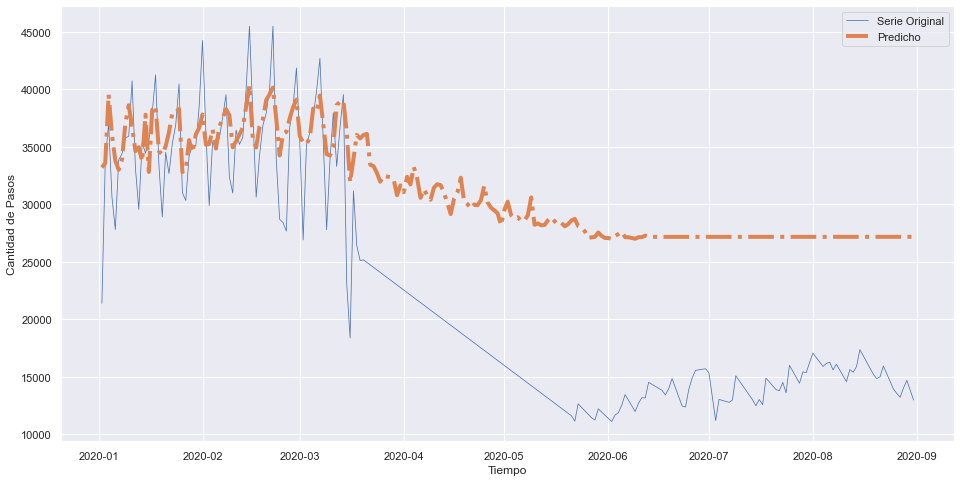

Error en Train: 1740.839209285958
Error en Test: 10931.527568940308


In [97]:
y_pred = clf.predict(X)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.figure(figsize=(16,8))
plt.plot(diario.index[1462:], np.exp(y[1371:]),lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[1462:], np.exp(y_test_pred),'-.', lw = 4, label = 'Predicho')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

MSE = mean_squared_error(np.exp(y_train), np.exp(y_train_pred))
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
print('Error en Test:',np.sqrt(MSE))

No mejora sustancialmente el modelo al considerar datos del año 2016 para entrenar.

### Parte C - Para pensar, investigar y, opcionalmente, implementar

1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

Buscaría la forma de agregar dummies por los días de la semana, las cuales pueden agregar información predictiva al modelo, dado que es problable que los fines de semana sean días de baja (o alta) en la cantidad de pasos.

2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

In [98]:
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2016, data_2017, data_2018, data_2019,data_2020])
dataset.forma_pago = dataset.forma_pago.str.upper()
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = dataset.forma_pago == 'EFECTIVO'
dataset = dataset[mask]
dataset

periodo       fecha  hora_inicio  hora_fin      dia  \
3           2016  2016-01-01            1         2  Viernes   
5           2016  2016-01-01            1         2  Viernes   
8           2016  2016-01-01            2         3  Viernes   
9           2016  2016-01-01            2         3  Viernes   
12          2016  2016-01-01            3         4  Viernes   
...          ...         ...          ...       ...      ...   
1627953     2020  2020-08-31           18        19    Lunes   
1627976     2020  2020-08-31           19        20    Lunes   
1628002     2020  2020-08-31           20        21    Lunes   
1628006     2020  2020-08-31           20        21    Lunes   
1628049     2020  2020-08-31           22        23    Lunes   

                                 estacion    sentido   tipo_vehiculo  \
3                                 Alberdi     Centro         Liviano   
5                                 Alberdi     Centro         Liviano   
8                                 Alberdi     Centro         Liviano   
9                                 Alberdi     Centro         Liviano   
12                                Alberdi     Centro         Liviano   
...                                   ...        ...             ...   
1627953                        AVELLANEDA  Provincia  Pesados 6 Ejes   
1627976                        AVELLANEDA     Centro  Pesados 6 Ejes   
1628002                        AVELLANEDA  Provincia  Pesados 6 Ejes   
1628006  DELLEPIANE LINIERSLEPIANE CENTRO     Centro  Pesados 6 Ejes   
1628049                DELLEPIANE LINIERS  Provincia  Pesados 6 Ejes   

        forma_pago  cantidad_pasos     mes  dia_fecha observacion  
3         EFECTIVO               4     NaN        NaN         NaN  
5         EFECTIVO              94     NaN        NaN         NaN  
8         EFECTIVO               1     NaN        NaN         NaN  
9         EFECTIVO             119     NaN        NaN         NaN  
12        EFECTIVO               1     NaN        NaN         NaN  
...            ...             ...     ...        ...         ...  
1627953   EFECTIVO               1  agosto       31.0    Efectivo  
1627976   EFECTIVO               1  agosto       31.0    Efectivo  
1628002   EFECTIVO               1  agosto       31.0    Efectivo  
1628006   EFECTIVO               1  agosto       31.0    Efectivo  
1628049   EFECTIVO               1  agosto       31.0    Efectivo  

[1644842 rows x 13 columns]

In [99]:
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'tipo_vehiculo',"sentido","mes","dia_fecha", "observacion"], inplace = True)
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset.drop(columns=['fecha','hora_fin',"dia"], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset.estacion = dataset.estacion.str.upper()

In [100]:
dataset.estacion = dataset.estacion.replace('DELLEPIANE LINIERS', 'DELLEPIANE')
dataset.estacion = dataset.estacion.replace('DELLEPIANE CENTRO', 'DELLEPIANE')
dataset.estacion = dataset.estacion.replace('DELLEPIANE LINIERSLEPIANE CENTRO', 'DELLEPIANE')
dataset.estacion = dataset.estacion.replace('ALBERTI', 'ALBERDI')
dataset.estacion.unique()


array(['ALBERDI', 'ILLIA', 'RETIRO', 'DELLEPIANE', 'AVELLANEDA'],
      dtype=object)

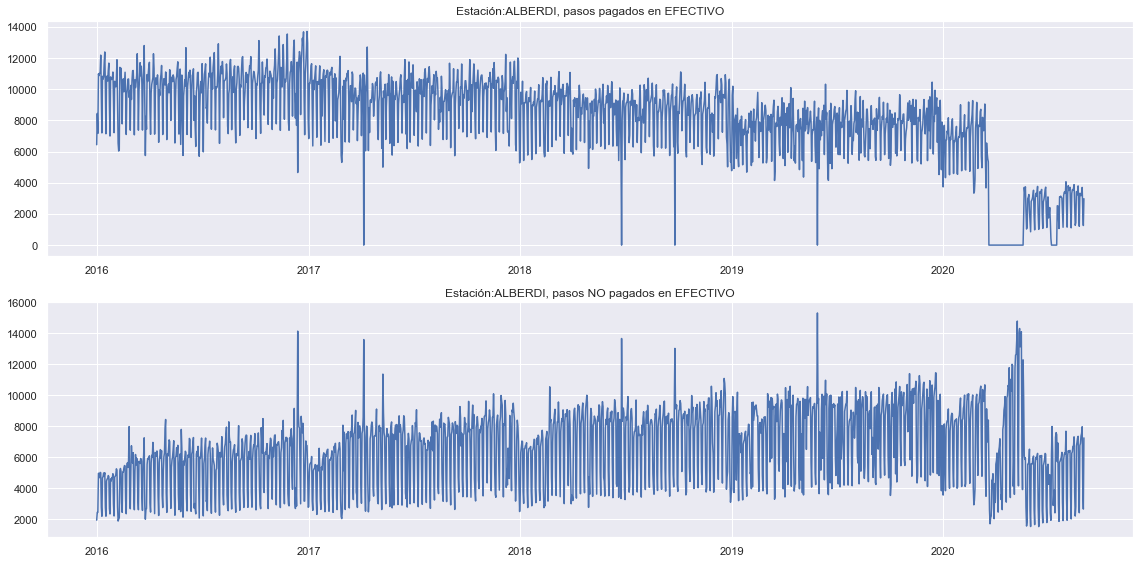

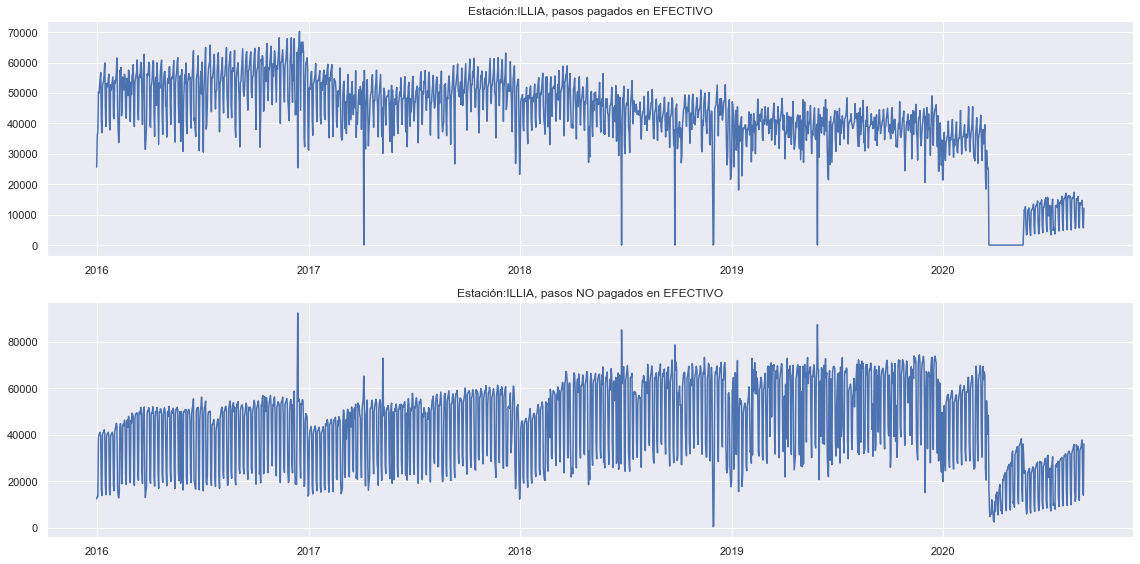

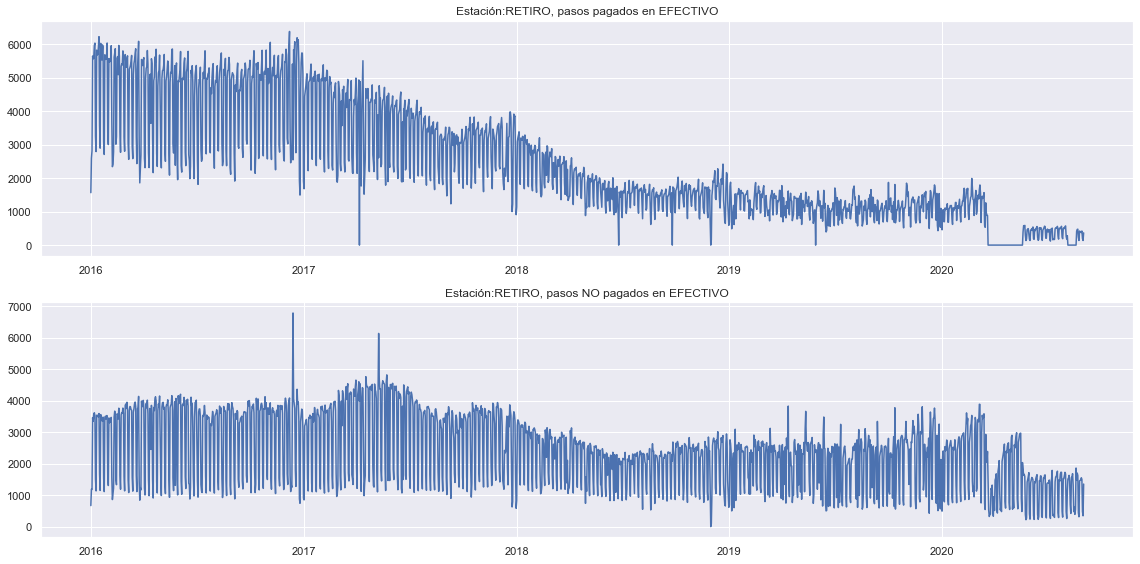

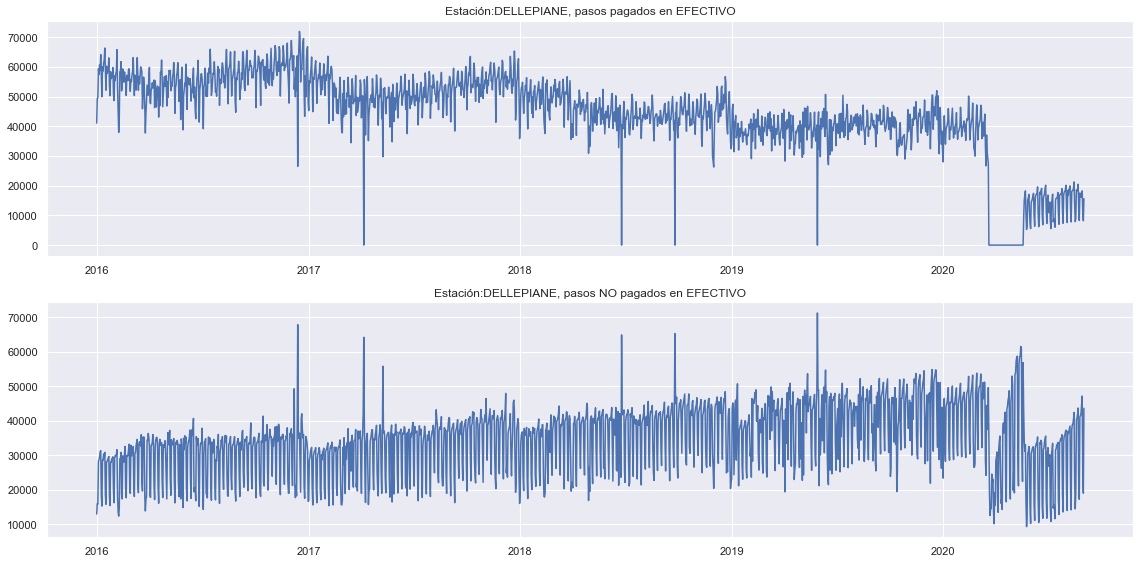

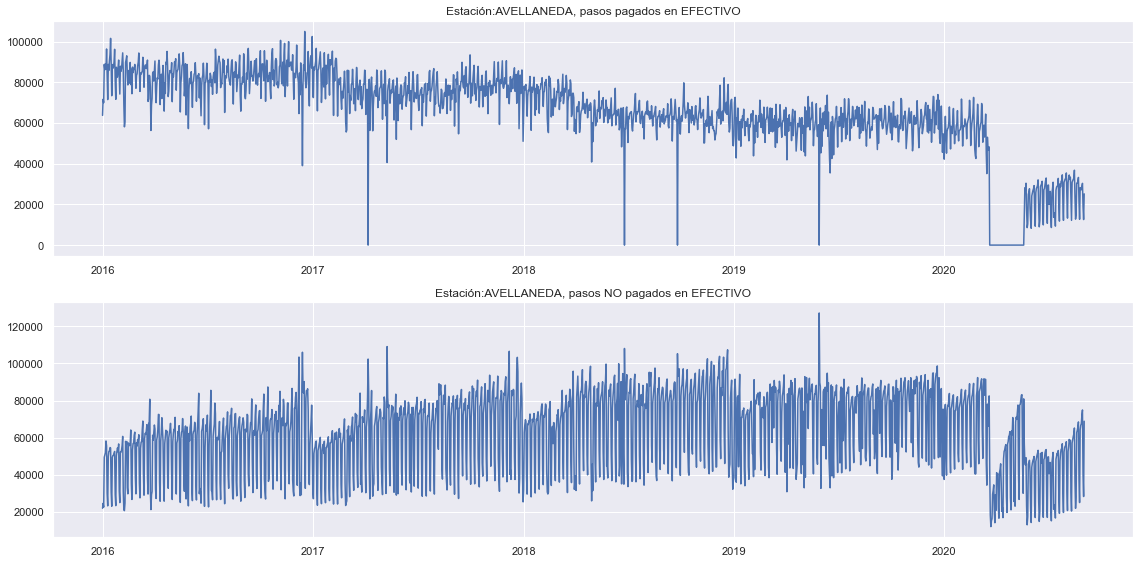

In [101]:
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2016, data_2017, data_2018, data_2019,data_2020])

dataset.drop(columns = ['periodo','hora_inicio', 'tipo_vehiculo',"sentido","mes","dia_fecha", "observacion"], inplace = True)
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset.drop(columns=['fecha','hora_fin',"dia"], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset.estacion = dataset.estacion.str.upper()

dataset.forma_pago = dataset.forma_pago.str.upper()

dataset.estacion = dataset.estacion.replace('DELLEPIANE LINIERS', 'DELLEPIANE')
dataset.estacion = dataset.estacion.replace('DELLEPIANE CENTRO', 'DELLEPIANE')
dataset.estacion = dataset.estacion.replace('DELLEPIANE LINIERSLEPIANE CENTRO', 'DELLEPIANE')
dataset.estacion = dataset.estacion.replace('ALBERTI', 'ALBERDI')


for i in ['ALBERDI', 'ILLIA', 'RETIRO', 'DELLEPIANE', 'AVELLANEDA']:
    data = dataset[dataset["estacion"]==i] 
    data2 = dataset[np.logical_and(dataset["estacion"]==i, dataset["forma_pago"]=="EFECTIVO")]
    data = data.resample('D', on = 'fecha').sum()
    data2 = data2.resample('D', on = 'fecha').sum()
    #data[data.cantidad_pasos <= 100] = np.nan
    fig, (ax1, ax2) = plt.subplots(2, figsize=(16,8))
    ax1.plot(data2)
    ax1.set_title(f"Estación:{i}, pasos pagados en EFECTIVO")
    
    ax2.plot(data.cantidad_pasos - data2.cantidad_pasos)
    ax2.set_title(f"Estación:{i}, pasos NO pagados en EFECTIVO")
    plt.tight_layout()
    plt.show()

Si bien vemos un shock los dias de cuarentena, podemos observar una leve tendencia decreciente al pago de los pasos en EFECTIVO en todas las estaciones, mientras se mantiene la tendencia de los pasos en total (al menos entre 2016 y 2019). 
Esto que implica que si la serie total tiene tendencia nula, relativamente el peso de los pasos en efectivo esta en caída frente a los demás pagos.

La serie que se destaca frente a las demás, es la correspondiente a la estación RETIRO, la cual en 2017 comienza un decrecimiento muy fuerte que luego se estabiliza en un nivel mas bajo en el año 2019.

3. ¿Hay algo que te gustaría investigar o probar?

En un segundo desarrollo quisiera probar una metodología llamada ARIMA, la cual es una metodología econométrica basada en modelos dinámicos que utiliza datos de series temporales.

La metodología utilizada en los estos modelos fue descrita inicialmente por el estadístico George Edward Pelham Box y el estadístico e ingeniero Gwilym Meirion Jenkins en 1970 en su libro: Análisis de series temporales. Predicción y control (Time Series Análisis: Forecasting and Control).

# Proyecto 04 - Series de Tiempo

Formula una nueva pregunta, problema o desafío para explorar: Para este proyecto, seleccioné:

    * Prueba un modelo de Machine Learning nuevo: Seleccioné el modelo llamado SARIMAX, que es una extensión del modelo ARIMA.
    
### Introducción a la metodología ARIMA

Para trabajar con modelos ARIMA es necesario tener en cuenta una serie de conceptos básicos tales como: 
* proceso estocástico
* ruido blanco
* sendero aleatorio
* estacionariedad

Un **proceso estocástico** es una sucesión de variables aleatorias ({Yt}, t = -∞,...-1, 0, 1,..., ∞) que dependen de un parámetro, en el caso de las series temporales este parámetro es el tiempo.

Un **ruido blanco** es una sucesión de variables aleatorias que se caracterizan por tener una esperanza constante e igual a cero (media = 0), igual varianza para cada variable, y además, son independientes a lo largo del tiempo (la covarianza entre las variables es cero).

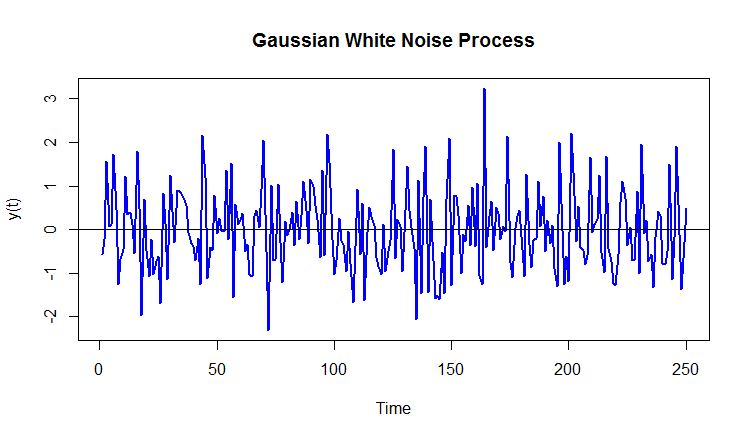

Un **sendero aleatorio** es un proceso estocástico que se caracteriza porque su primera diferencia es un ruido blanco (tiene tendencia).

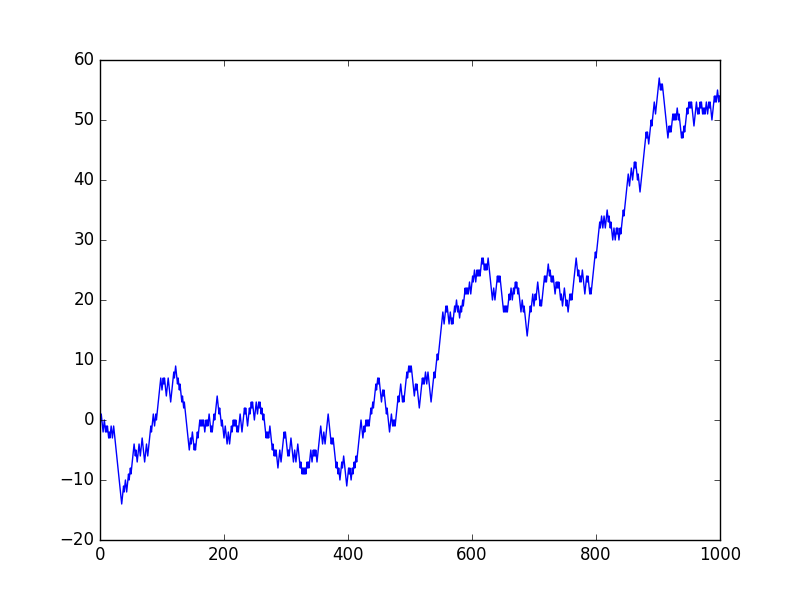

Un proceso estocástico es **débilmente estacionario o estacionario** en un sentido amplio, si se cumple que su media y su varianza son constantes para cualquier período de tiempo y las covarianzas entre dos variables solo dependen del lapso de tiempo que transcurre entre ellas.

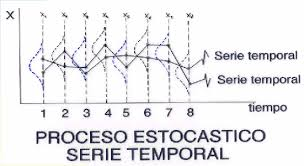

### Etapas en la elaboración de un modelo arima

#### 1. Identificación

Para identificar cual es el proceso ARIMA que ha generado una determinada serie temporal es necesario que los datos sean estacionarios, es decir, no pueden presentar tendencia creciente o decreciente (si presentan tendencia habría que diferenciar la serie porque la serie no es estacionaria en media), ni tampoco pueden presentar fluctuaciones de diferente amplitud. Si la dispersión no se mantiene constante entonces la serie no es estacionaria en varianza y habría que transformarla siendo, la transformación logarítmica la más habitual.

Una vez que la serie es estacionaria es necesario obtener las funciones de autocorrelación simple y parcial muestrales para determinar el proceso ARIMA(p,d,q) más adecuado que haya podido generar la serie estacionaria.

En los modelos ARIMA(p,d,q), "p" representa el orden del proceso autorregresivo, "d" el número de diferencias que son necesarias para que el proceso sea estacionario y "q" representa el orden del proceso de medias móviles.

Para identificar un proceso autorregresivo de orden "p", es necesario que la función de autocorrelación simple no se anule y decrezca de forma exponencial o sinusoidal hacia cero, mientras que, la función de autocorrelación parcial tenga solo "p" coeficientes distintos de cero. La expresión general de un AR(p) es una combinación lineal de "p" valores pasados de la variable y un ruido blanco actual,

                                Yt = φ1 Yt-1 + ... + φp Yt-p + at 
o bien:

                                (1 — φ1L — ... — φpLp) Yt = at

Escrito de forma compacta: 

                                        φt (L)Yt = at

Donde at es un ruido blanco y L es el operador de retardos.

Si el proceso es de medias móviles de orden "q", el comportamiento de las funciones de autocorrelación simple y parcial será el contrario de los procesos autorregresivos, es decir, la función de autocorrelación simple tendrá "q" coeficientes distintos de cero y la función de autocorrelación parcial no se anula y decrece de forma exponencial o sinusoidal hacia cero. La expresión general de un MA(q) muestra como la variable Yt es una combinación lineal de ruidos blancos,

                                Yt = at + θ1at-1 + ... + θqat-q 
o bien:
                                
                                (1 - θ1L — ... — θqLq)at = Yt

Escrito en forma compacta: 

                                        θq(L)at = Yt

Donde at es ruido blanco.

Sin embargo, si el proceso es un ARMA, ni la función de autocorrelación simple y ni la parcial se anulan y su identificación es más complicada que la de un AR o un MA. Así, los procesos ARMA o modelos mixtos se obtienen de combinar los procesos AR y MA. La expresión general de un ARMA(p,q) es:

                    Yt = φ1Yt-1 + ... + φpYt-p + at + θ1at-1 + ... + θqat-q

O bien:

                    (1 - φ1L — ... - φpLp) Yt = (1 - θ1L - ... — θqLq)at

Escrito en forma compacta: 

                                        φp (L)Yt = θq (L)at

Donde at es ruido blanco. Los procesos ARMA(p,q) son estacionarios si las p raíces del polinomio de la parte autorregresiva están fuera del círculo unidad y será invertible si las q raíces del polinomio de parte de las medias móviles están también fuera del círculo unidad.

#### 2. Estimación

Después de identificar el proceso que ha generado los datos de una determinada serie temporal es necesario estimar los parámetros de los que depende. Si se supone que de forma genérica que el proceso es estacionaria es invertible y que la serie temporal ha sido generada por un ARIMA(p,d,q), entonces, la transformación estacionaria Wt = (1-L)dYt será un ARMA(p,q):

                        Wt = φ1Wt-1 + ... + φpWt-p + at + θ1at-1 + ... + θqat-q

donde los parámetros que hay que estimar son: 

                                            φ1,..., φp, θ1,..., θp.

Estos parámetros del modelo ARMA se pueden estimar por máxima verosimilitud asumiendo que la distribución la serie, por ejemplo, es Normal. 

#### 3. Validación

Después de estimar el modelo es necesario comprobar si se ajusta o no de forma adecuada a los datos observados de la serie temporal objeto de estudio. Para comprobar si el modelo es adecuado se suele realizar lo siguiente: 
* análisis de los parámetros estimados
* análisis de los residuos
* análisis de la bondad del ajuste
* análisis de estabilidad.

**a) Análisis de los parámetros estimados.**

Es necesario contrastar si los parámetros estimados son estadísticamente significativos o no. Para ello la hipótesis nula, para cada uno de los coeficientes, plantea que este es cero frente a la hipótesis alternativa que es distinto de cero. El estadístico del contraste se basa en la distribución t de Student. Si al realizar el contraste alguno de los parámetros no fuese significativo sería necesario eliminarlo del modelo.

**b) Análisis de los residuos.**

Uno de los supuestos del modelo ARIMA es que las perturbaciones aleatorias son ruido blanco, sin embargo, como estas son inobservables es necesario calcular los residuos y comprobar si estos son ruido blanco o no. Existen varias formas de comprobar si los residuos son ruido blanco o no, entre ellas se puede destacar: 
* el gráfico de los residuos
* la función de autocorrelación simple y parcial estimada de los residuos
* el contraste de Portmanteau.

En primer lugar, el **gráfico de los residuos** nos puede indicar de forma intuitiva si su media es constante e igual a cero, y también, si su varianza es constante. Además, también puede indicar si se producen errores sistemáticos o no, así como, si existen valores atípicos (aquellos que excedan tres veces su desviación típica). Si existiesen valores atípicos sería necesario llevar a cabo un análisis de intervención adecuado que recoja la información proporcionada por dichos valores.

En segundo lugar, se analizarían las **funciones de autocorrelación simple (FAC) y parcial (FACP) muestrales de los residuos**. De tal forma, que si el modelo está estimado de forma correcta, entonces, todos los coeficientes estimados de la FAC y FACP tienen que ser estadísticamente nulos. Si, por el contrario, la FAC y FACP indicasen que los residuos no son ruido blanco entonces, será necesario identificar el proceso e incorporar esta información en el modelo inicial propuesto con el fin de volver a estimar otra vez el modelo.

Por último, el **contraste de Portmanteau** o contraste global de significación se utiliza para comprobar si hay ausencia de autocorrelación entre los términos de error, es decir,

H0: ρ1 = ρ2 = ... = ρm = 0

H1: algún ρk ≠ 0, k = 1,..., m

donde ρk es el coeficiente de orden k de la FAC del proceso de ruido blanco. El estadístico Q(m) de Box-Pierce (1970) o el actualizado por Ljung-Box(1976) para realizar este contraste se distribuyen como una χ2 con (m-p-q) grados de libertad. Si para un nivel de significación α se acepta la hipótesis nula los residuos son ruido blanco, y si se rechaza habrá que volver a estimar el modelo.

**c) Análisis de la bondad del ajuste.**

Para ver la adecuación que existe entre la serie real y la estimada se puede utilizar el R2 o el R2-ajustado. Cuanto más próximos estén estos coeficientes a uno mejor será el modelo ajustado.

Sin embargo, si se quieren comparar diferentes modelos, estos coeficientes solo se podrán utilizar cuando se hayan calculado el mismo número de diferencias. En este caso, habrá que utilizar otros métodos alternativos de comparación, tales como, el criterio de información de Akaike (AIC) o el criterio de información de Bayes (BIC). En ambos casos, se elegirá como más adecuado aquel modelo que tenga un menor valor del AIC o del BIC.

**d) Análisis de estabilidad.**

Este análisis, permite establecer si el modelo ARIMA estimado, para el período muestral, es estable también en períodos futuros. Si esto es así se podrán obtener predicciones fiables de la variable objeto de estudio. Para realizar este análisis de estabilidad se puede utilizar el test de estabilidad estructural de Chow.


#### 4. Predicción

Una vez estimado y validado el modelo ARIMA se puede utilizar para obtener valores futuros de la variable objeto de estudio. Las predicciones obtenidas pueden ser de dos tipos: puntuales o por intervalos. La predicción puntual se obtiene calculando el valor esperado de la variable en el período futuro T+l condicionado al conjunto de información disponible hasta el período T. Y la predicción por intervalos, para un nivel de confianza del 95 %, se obtiene sumando y restando a la predicción puntual la desviación típica del error de predicción multiplicada por el valor tabulado para el 95 % de confianza.

Las características genéricas de las predicciones realizadas con modelos ARIMA son:

    a) En los modelos AR(p). La predicción a medida que aumenta el horizonte temporal, tiende a la media del proceso.
    b) En los modelos MA(q). Si el horizonte temporal de la predicción es mayor que el orden del proceso entonces, la predicción es igual a la media.
    c) En los modelos ARMA(p,q). Para períodos superiores al orden del proceso de las medias móviles, la función de predicción se comporta como la de un proceso AR(p) y, por lo tanto, tiende a la media.
    d) En los modelos ARIMA(p,d,q). La predicción ya no tiende a la media, sino que será una línea recta con pendiente igual a la media del proceso que se obtiene al hacer las transformaciones necesarias para que la serie sea estacionaria.
    
    
#### 5. Resumen

Tenemos a modo de simplificar la metodología la siguiente imagen que describe que buscamos realizar:
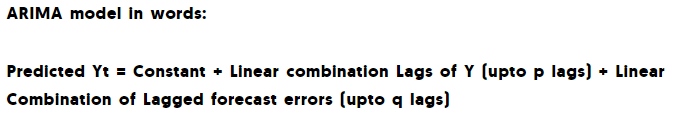

El siguiente bloque realizo lo siguiente: Cargo el dataset, los concateno para trabajar con una sola base, me quedo con los datos de la estación ILLIA y los pasos en EFECTIVO. Luego dejo sin consideracion algunas columnas de los datos, transformo los datos en tipo "datetime" y cambio la frecuencia a valores diarios. Mientras que para valores bajos analizados anteriormente, los interpolamos de manera lineal. Y al final graficamos la serie:

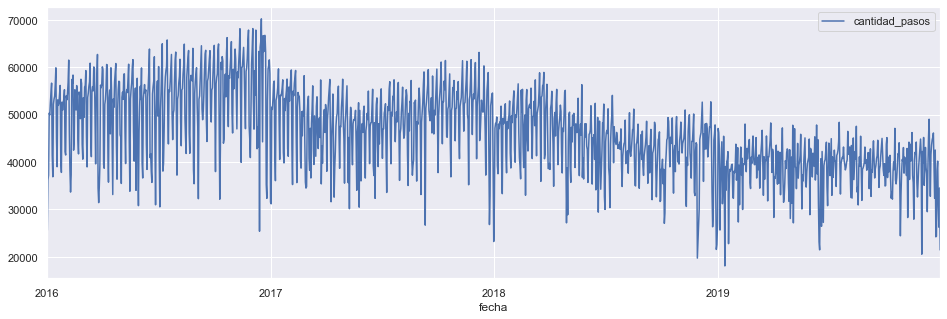

In [102]:
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
#data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2016, data_2017, data_2018, data_2019
                     #,data_2020
                    ])

mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

diario = dataset.resample('D', on = 'fecha').sum()

diario.cantidad_pasos[diario.cantidad_pasos <= 10000] = np.nan
diario = diario.interpolate()

diario.plot()

Separo nuevamente a los datos en entrenamiento y test

Observations: 1461
Training Observations: 1339
Testing Observations: 122


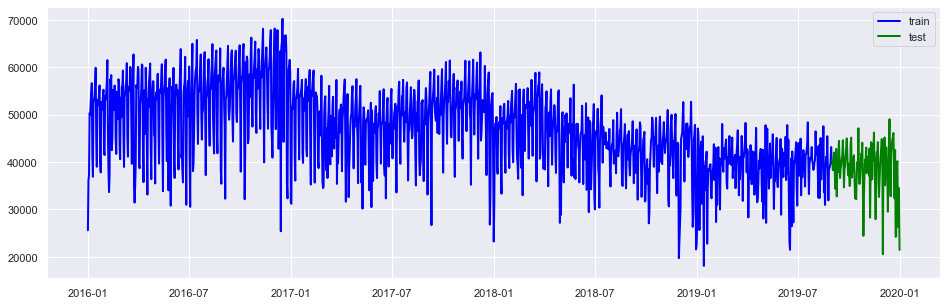

In [103]:
train_size = int(len(diario.cantidad_pasos) * 0.917)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train.index, train.cantidad_pasos,
         color='blue', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='green', lw=2, label="test")
plt.legend()
plt.show()

Verifico si es necesario diferenciar la serie mediante la prueba de Dickey-Fuller Aumentada. Debo realizarla nuevamente ya que agregue la información de 2016 para hacer las estimaciones.

In [104]:
result = adfuller(diario.cantidad_pasos.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.341200
p-value: 0.610119
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Comparando el p-value de la prueba con 0.05, indica que tendríamos que aceptar la hipótesis nula que la serie de tiempo no es estacionaria y tiene una estructura dependiente del tiempo.

Realizamos la prueba nuevamente con la serie diferenciada para verificar si requiere de una segunda diferenciación.

In [105]:
result = adfuller(diario.cantidad_pasos.diff(1)[1::])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.255180
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Comparando el p-value de la prueba con 0.05, indica que tendríamos que rechazar la hipótesis nula, por lo tanto la serie de tiempo diferencia en 1 orden, es estacionaria.

Como ya tengo a mi serie diferenciada, calculo a través de arma_order_select_ic. Este método puede utilizarse para identificar provisionalmente el orden de un proceso de ARMA, siempre que la serie temporal sea estacionaria e invertible.

In [106]:
resDiff = sm.tsa.arma_order_select_ic(train.diff(1)[1::], max_ar=7, max_ma=7, ic='aic', trend='nc')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (7, 7) is the best.


Como ya encontré los hiperparametros (p,d,q) = (7,1,7), realizaré el entrenamiento del modelo

In [107]:
arima = ARIMA(train, order=(7,1,7), freq='D').fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.cantidad_pasos   No. Observations:                 1338
Model:                 ARIMA(7, 1, 7)   Log Likelihood              -13264.998
Method:                       css-mle   S.D. of innovations           4852.925
Date:                Tue, 20 Oct 2020   AIC                          26561.996
Time:                        15:08:04   BIC                          26645.179
Sample:                    01-02-2016   HQIC                         26593.162
                         - 08-31-2019                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10.0538     12.443      0.808      0.419     -14.335      34.442
ar.L1.D.cantidad_pasos    -0.7606      0.022    -35.181      0.000      -0.803      -0.718
ar.L2.D.cantidad_pasos    -0.7587      0.022    -35.150      0.000      -0.801      -0.716
ar.L3.D.cantidad_pasos    -0.7611      0.022    -35.192      0.000      -0.803      -0.719
ar.L4.D.cantidad_pasos    -0.7581      0.022    -35.165      0.000      -0.800      -0.716
ar.L5.D.cantidad_pasos    -0.7610      0.022    -35.379      0.000      -0.803      -0.719
ar.L6.D.cantidad_pasos    -0.7616      0.022    -35.405      0.000      -0.804      -0.719
ar.L7.D.cantidad_pasos     0.2376      0.022     11.033      0.000       0.195       0.280
ma.L1.D.cantidad_pasos     0.0554      0.014      3.842      0.000       0.027       0.084
ma.L2.D.cantidad_pasos     0.0543      0.017      3.224      0.001       0.021       0.087
ma.L3.D.cantidad_pasos     0.0544      0.015      3.731      0.000       0.026       0.083
ma.L4.D.cantidad_pasos     0.0312      0.015      2.105      0.035       0.002       0.060
ma.L5.D.cantidad_pasos     0.0658      0.016      4.065      0.000       0.034       0.098
ma.L6.D.cantidad_pasos     0.0805      0.014      5.923      0.000       0.054       0.107
ma.L7.D.cantidad_pasos    -0.9128      0.016    -55.332      0.000      -0.945      -0.880
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9016           -0.4331j            1.0002           -0.4287
AR.2           -0.9016           +0.4331j            1.0002            0.4287
AR.3           -0.2220           -0.9751j            1.0001           -0.2856
AR.4           -0.2220           +0.9751j            1.0001            0.2856
AR.5            0.6241           -0.7816j            1.0002           -0.1427
AR.6            0.6241           +0.7816j            1.0002            0.1427
AR.7            4.2040           -0.0000j            4.2040           -0.0000
MA.1           -0.9051           -0.4325j            1.0031           -0.4291
MA.2           -0.9051           +0.4325j            1.0031            0.4291
MA.3           -0.2171           -0.9763j            1.0001           -0.2848
MA.4           -0.2171           +0.9763j            1.0001            0.2848
MA.5            0.6328           -0.7873j            1.0100           -0.1422
MA.6            0.6328           +0.7873j            1.0100            0.1422
MA.7            1.0670           -0.0000j            1.0670           -0.0000
-----------------------------------------------------------------------------
"""

Bajo esta metodologia debo revisar los resultados de los residuos

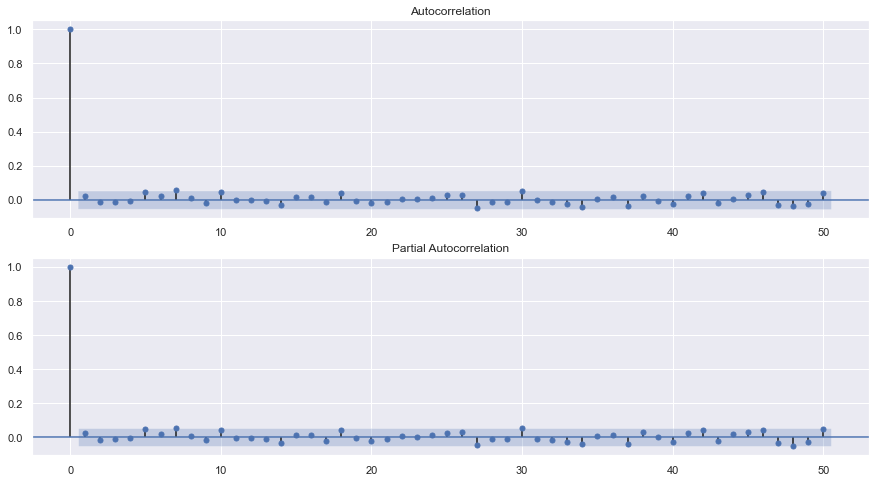

In [108]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

Debo verificar que los residuos se comporte como ruido blanco y su distribución sea similar a la normal

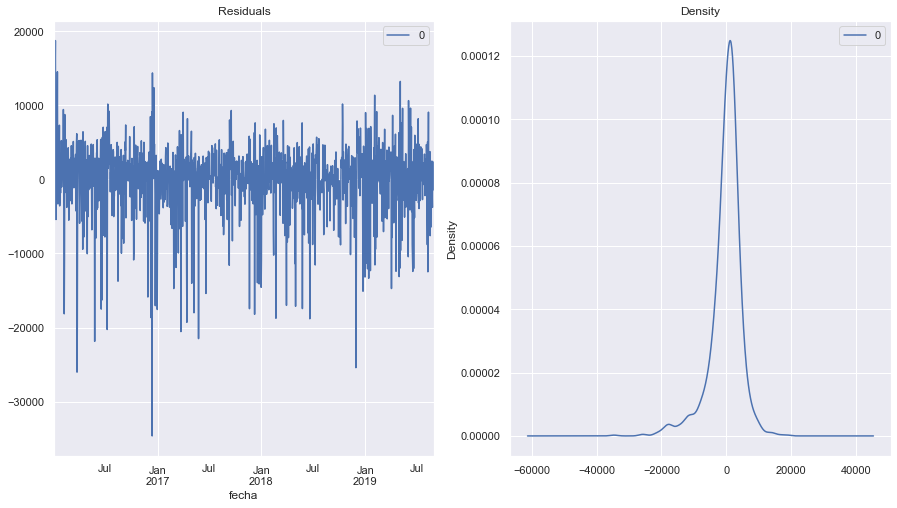

In [109]:
residuals = pd.DataFrame(arima.resid)
fig, ax = plt.subplots(1,2,figsize=(15,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Realizo un grafico comparativo entre la prediccion de la serie y los valores observados en entrenamiento

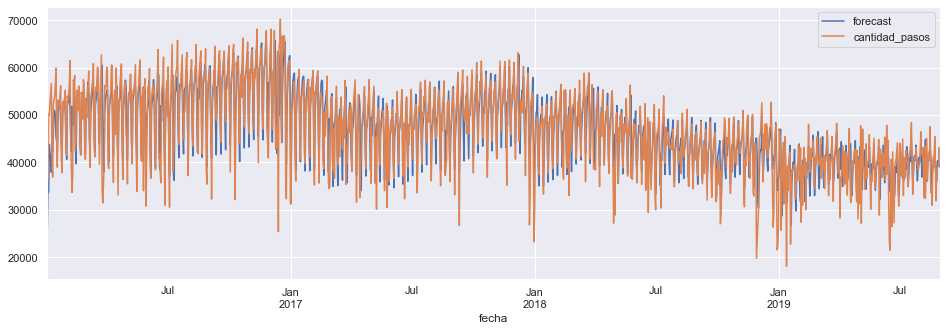

In [110]:
arima.plot_predict(dynamic=False)
plt.show()

Realizo una estimación (color verde del gráfico) en test, comparo con los valores observados (naranja), y además agrego en gris los intérvalos de confianza de un 95% en donde se ubicarán los resultados verdaderos.

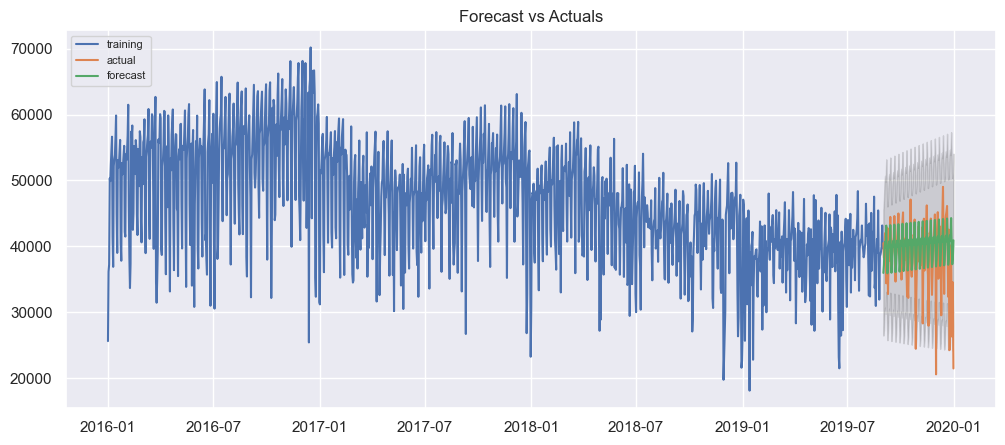

In [111]:
# Forecast
fc, se, conf = arima.forecast(122, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Focalizo el gráfico para el período de test y calculo el RMSE para dicho periodo.

ARIMA model RMSE en test :5073.957360332514


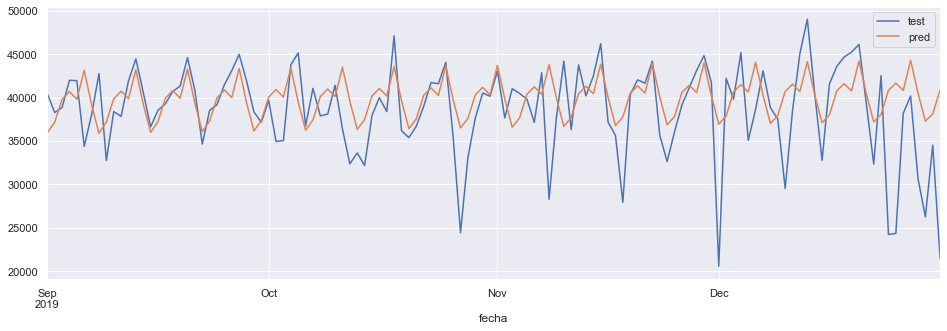

In [112]:
pd.DataFrame({'test':test.cantidad_pasos,'pred':fc_series}).plot()
print('ARIMA model RMSE en test :{}'.format(np.sqrt(mean_squared_error(test,fc_series))))
plt.show()

Como una segunda iteración, decido aplicar la misma metodología pero **tomando logaritmos** en la serie para lograr tener homocedasticidad.

In [113]:
result = adfuller(np.log(diario.cantidad_pasos))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.551611
p-value: 0.507843
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Como el p-value es mayor a 0.05, debemos diferenciar la serie

In [114]:
result = adfuller(np.log(diario.cantidad_pasos).diff(1)[1::])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.862209
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Calculamos los hiperparámetros p y q para la serie

In [115]:
resDiff = sm.tsa.arma_order_select_ic(np.log(train).diff(1)[1::], max_ar=7, max_ma=7, ic='aic', trend='nc')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (7, 7) is the best.


Como observamos, tenemos los mismos hiperparámetros que para la serie sin tomar logaritmos

In [116]:
arima = ARIMA(np.log(train.cantidad_pasos), order=(7,1,7),freq='D').fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.cantidad_pasos   No. Observations:                 1338
Model:                 ARIMA(7, 1, 7)   Log Likelihood                 936.673
Method:                       css-mle   S.D. of innovations              0.119
Date:                Tue, 20 Oct 2020   AIC                          -1841.346
Time:                        15:15:49   BIC                          -1758.163
Sample:                    01-02-2016   HQIC                         -1810.180
                         - 08-31-2019                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0001      0.000     -0.649      0.516      -0.001       0.000
ar.L1.D.cantidad_pasos    -0.7365      0.019    -39.479      0.000      -0.773      -0.700
ar.L2.D.cantidad_pasos    -0.7352      0.018    -39.904      0.000      -0.771      -0.699
ar.L3.D.cantidad_pasos    -0.7376      0.019    -39.736      0.000      -0.774      -0.701
ar.L4.D.cantidad_pasos    -0.7345      0.018    -39.739      0.000      -0.771      -0.698
ar.L5.D.cantidad_pasos    -0.7380      0.018    -40.136      0.000      -0.774      -0.702
ar.L6.D.cantidad_pasos    -0.7374      0.019    -39.735      0.000      -0.774      -0.701
ar.L7.D.cantidad_pasos     0.2613      0.018     14.226      0.000       0.225       0.297
ma.L1.D.cantidad_pasos     0.0401      0.014      2.820      0.005       0.012       0.068
ma.L2.D.cantidad_pasos     0.0421      0.014      2.980      0.003       0.014       0.070
ma.L3.D.cantidad_pasos     0.0480      0.012      3.916      0.000       0.024       0.072
ma.L4.D.cantidad_pasos     0.0237      0.013      1.885      0.059      -0.001       0.048
ma.L5.D.cantidad_pasos     0.0531      0.014      3.856      0.000       0.026       0.080
ma.L6.D.cantidad_pasos     0.0579      0.014      4.168      0.000       0.031       0.085
ma.L7.D.cantidad_pasos    -0.9317      0.014    -66.412      0.000      -0.959      -0.904
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9019           -0.4332j            1.0005           -0.4287
AR.2           -0.9019           +0.4332j            1.0005            0.4287
AR.3           -0.2220           -0.9751j            1.0001           -0.2856
AR.4           -0.2220           +0.9751j            1.0001            0.2856
AR.5            0.6240           -0.7815j            1.0001           -0.1428
AR.6            0.6240           +0.7815j            1.0001            0.1428
AR.7            3.8219           -0.0000j            3.8219           -0.0000
MA.1           -0.9057           -0.4321j            1.0035           -0.4291
MA.2           -0.9057           +0.4321j            1.0035            0.4291
MA.3           -0.2181           -0.9766j            1.0007           -0.2850
MA.4           -0.2181           +0.9766j            1.0007            0.2850
MA.5            0.6294           -0.7853j            1.0064           -0.1425
MA.6            0.6294           +0.7853j            1.0064            0.1425
MA.7            1.0510           -0.0000j            1.0510           -0.0000
-----------------------------------------------------------------------------
"""

Realizamos una predicción con el modelo entrenado

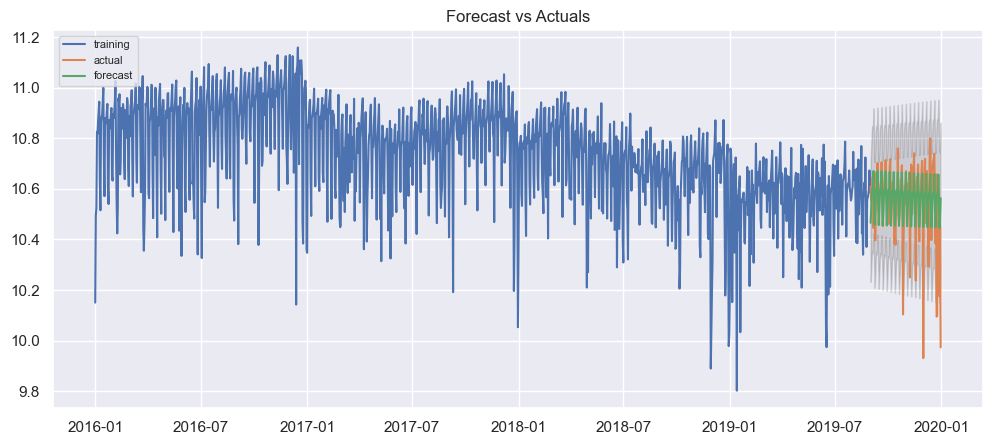

In [117]:
# Forecast
fc, se, conf = arima.forecast(122, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(np.log(train), label='training')
plt.plot(np.log(test), label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Focalizamos la predicción y obtenemos el RMSE para el test

ARIMA model RMSE:4768.84677916354


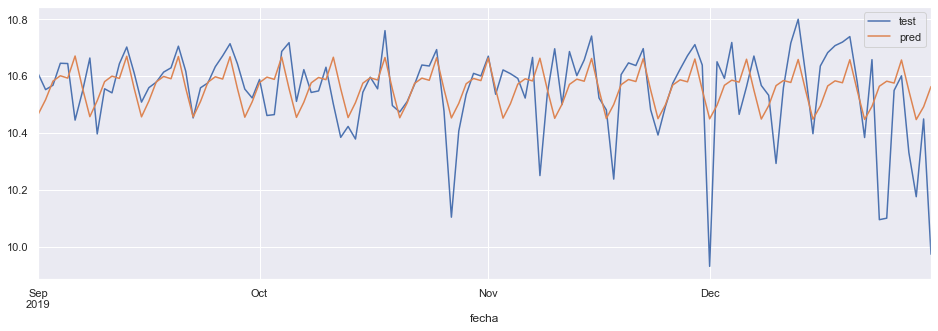

In [118]:
pd.DataFrame({'test':np.log(test.cantidad_pasos),'pred':fc_series}).plot()
print('ARIMA model RMSE:{}'.format(np.sqrt(mean_squared_error(test,np.exp(fc_series)))))
plt.show()

# Análisis final sobre los resultados obtenidos

Si bien no se logran mejoras en los resultados obtenidos ya que el RMSE en test para el **RandomForestRegressor** es 4398, mientras que bajo el modelo **ARIMA** tomando logaritmos es 4768, estoy muy satisfecho con el trabajo realizado. Me vi capaz de aplicar conocimientos teóricos obtenidos en mi licenciatura en economía en un lenguaje de programación como Python y, además, pude demostrar como metodologías alternativas aprendidas bajo esta carrera me brindan más herramientas para trabajar este tipo de problemas.

Al comparar con el modelo **benchmark**, donde su RMSE para el mismo período es 6220, **se logra una reducción sustancial** en el error promedio. Considero que es una *mejora significativa* en la estimación de pasos pagados en efectivo para la estación Illia.

Este proyecto también presenta las **limitaciones del Machine Learning** y los distintos algoritmos para estimar ante situaciones como el *COVID-19 y sus efectos*. Cuando se evalúa el modelo para el período 2020, en donde este shock cambia completamente el comportamiento social observado, el error se dispara. Es por ello que se deben tener controles que levanten alertas ante posibles escaladas del error provisto por el modelo. Donde luego pueden desarrollarse umbrales de aceptación al error, que una vez superados, se re-estimará un modelo con datos actuales.